In [30]:
import numpy as np
import scipy

import cupy as cp
import cupyx.scipy

import astropy.units as u
from astropy.io import fits
from matplotlib.patches import Rectangle, Circle
from pathlib import Path
from IPython.display import clear_output
from importlib import reload
import time

import warnings
warnings.filterwarnings("ignore")

import poppy
import hcipy as hci

import wfsc_tests as wfsc
wfsc.math_module.update_np(np)
wfsc.math_module.update_scipy(scipy)

import misc_funs as misc

import hcipy_models as hcim
reload(hcim)
c = hcim.SVC()

In [31]:
influence_functions = hci.make_gaussian_influence_functions(c.pupil_grid, c.Nact, c.actuator_spacing)


In [47]:
reload(hcim)
c = hcim.SVC(influence_functions=influence_functions,
             dm1_dm2=2000*u.mm,
             aberration_distance=500e-3*u.m)

In [48]:
im = c.snap()


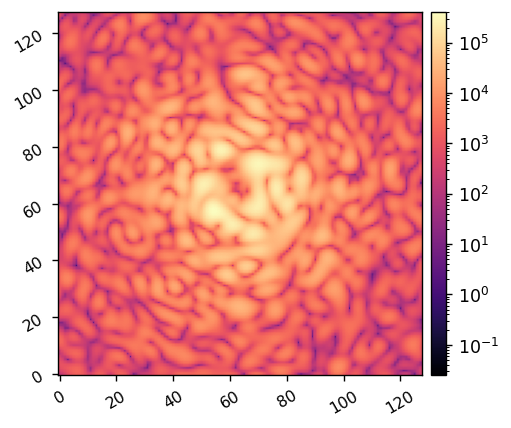

In [49]:
wfsc.imshow1(im, lognorm=True)

# define the dark hole region

In [39]:
reload(wfsc)
reload(wfsc.utils)
reload(wfsc.imshows)
xfp = (np.linspace(-npsf/2, npsf/2-1, npsf) + 1/2)*c.psf_pixelscale_lamD
fpx,fpy = np.meshgrid(xfp,xfp)
fpr = np.sqrt(fpx**2 + fpy**2)

iwa = 3
owa = 9
roi_params = {
        'inner_radius' : iwa,
        'outer_radius' : owa,
#         'edge' : 2.5,
        'rotation':0,
        'full':True,
    }
roi1 = wfsc.utils.create_annular_focal_plane_mask(fpx, fpy, roi_params, plot=True)

iwa = (3-1)
owa = (9+1)
roi_params = {
        'inner_radius' : iwa,
        'outer_radius' : owa,
#         'edge' : 2,
        'rotation':0,
        'full':True,
    }
roi2 = wfsc.utils.create_annular_focal_plane_mask(fpx, fpy, roi_params, plot=True)

# wfsc.imshow2(roi1, roi2)
weight_map = roi1 + 0.2*(roi2 * ~roi1)
control_mask = weight_map>0
wfsc.imshow1(weight_map)

probe_amp = 3e-8
calib_amp = 5e-9

NameError: name 'npsf' is not defined

(396, 1156)

(198, 2)

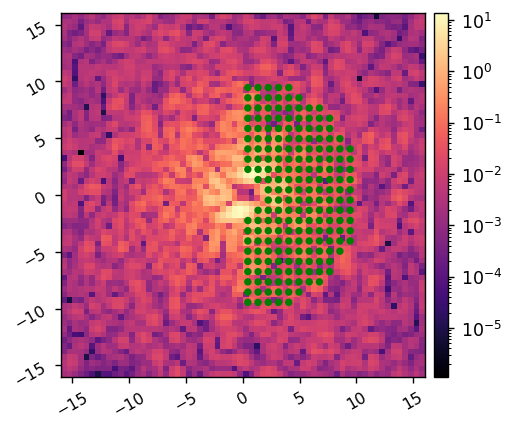

In [30]:
reload(wfsc.utils)
fourier_modes, fs = wfsc.utils.select_fourier_modes(c, control_mask*(fpx>0), fourier_sampling=0.9) 
nmodes = fourier_modes.shape[0]
nf = fourier_modes.shape[0]//2
display(fourier_modes.shape, fs.shape)

patches = []
for f in fs:
    center = (f[0], f[1])
    radius = 0.25
    patches.append(Circle(center, radius, fill=True, color='g'))
    
wfsc.imshow1(ref_im, lognorm=True, pxscl=c.psf_pixelscale_lamD, patches=patches)

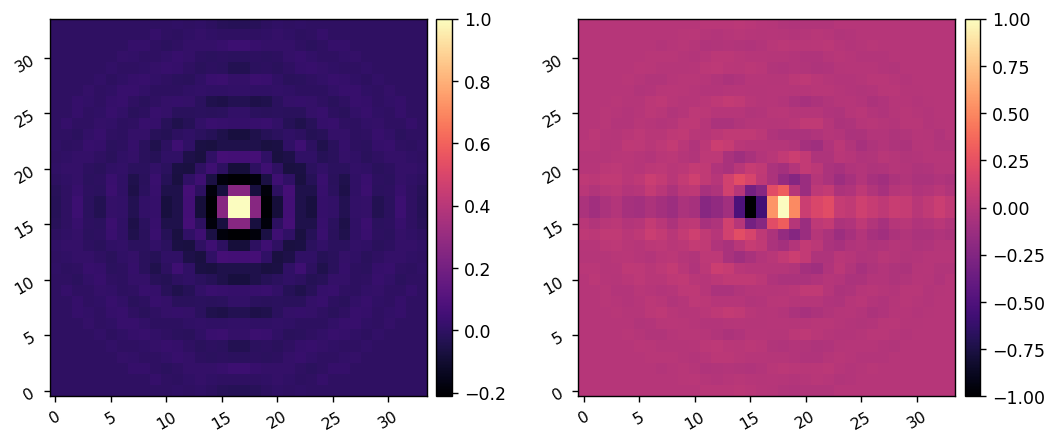

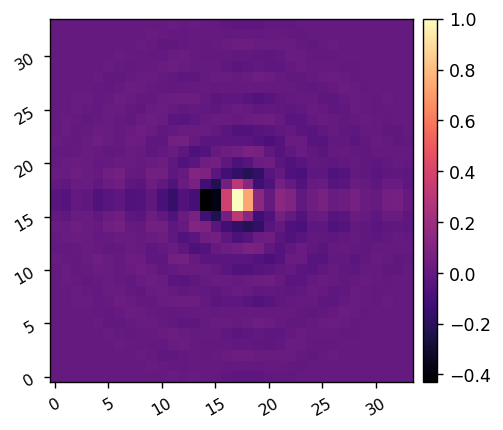

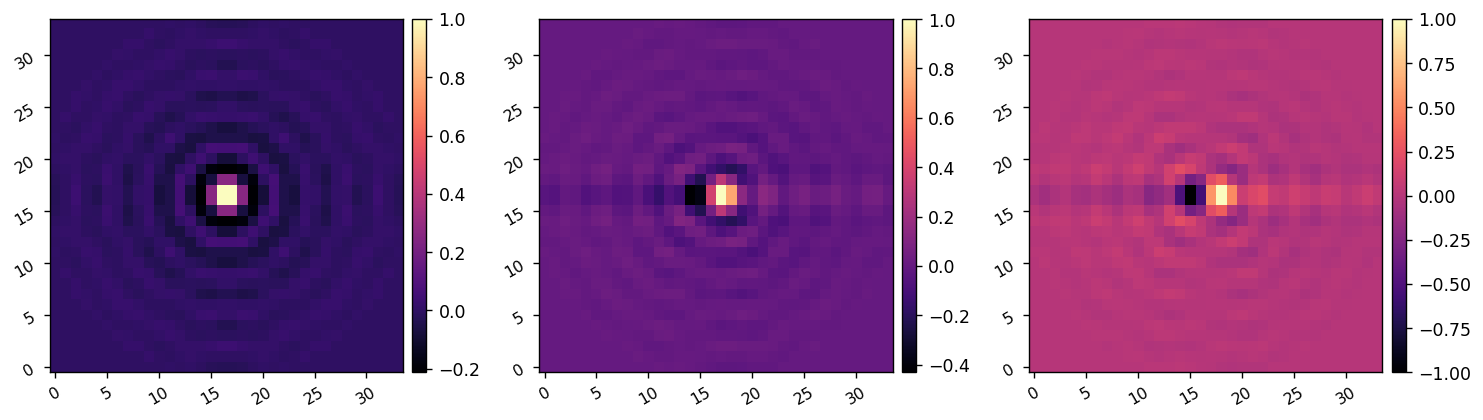

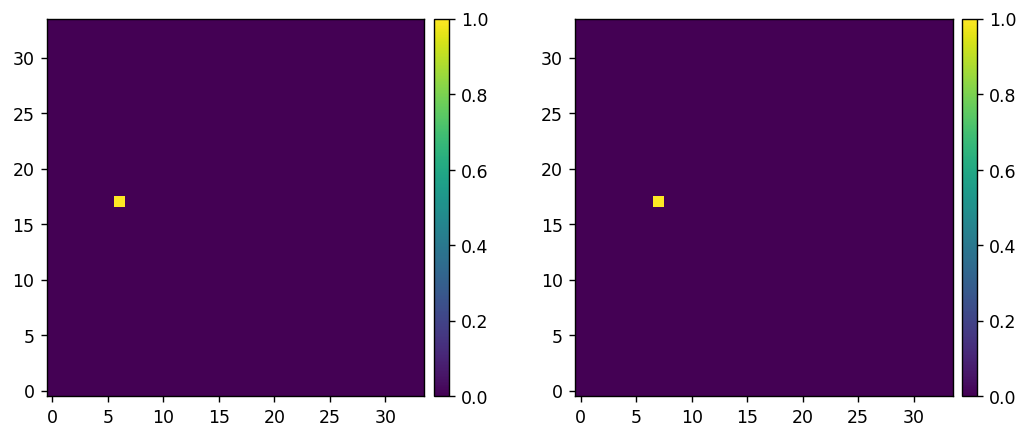

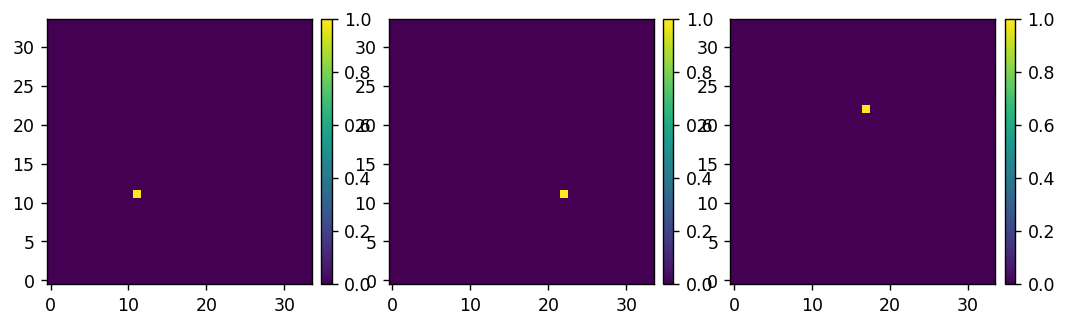

In [31]:
reload(wfsc.utils)
probe_modes_1 = wfsc.utils.create_fourier_probes(fourier_modes, Nact=34, plot=True)
probe = 1/np.sqrt(2) * np.sum((fourier_modes[:nf] + fourier_modes[nf:]), axis=0).reshape(Nact,Nact)
probe /= probe.max()
wfsc.imshow1(probe)

probe_modes = np.array([probe_modes_1[0], probe, probe_modes_1[1]])
wfsc.imshow3(probe_modes[0], probe_modes[1], probe_modes[2])

probe_modes = wfsc.utils.create_probe_poke_modes(Nact, 
                                                 poke_indices=[(Nact//5, Nact//2), (Nact//5+1, Nact//2)], 
                                                 plot=True)

probe_modes = wfsc.utils.create_probe_poke_modes(Nact, 
                                                 poke_indices=[(Nact//3, Nact//3), 
                                                               (2*Nact//3, Nact//3), 
                                                               (Nact//2, 2*Nact//3)], 
                                                 plot=True)


# probe_modes = probe_modes_1 + probe_modes_2

# wfsc.imshow2(probe_modes[0], probe_modes[1])

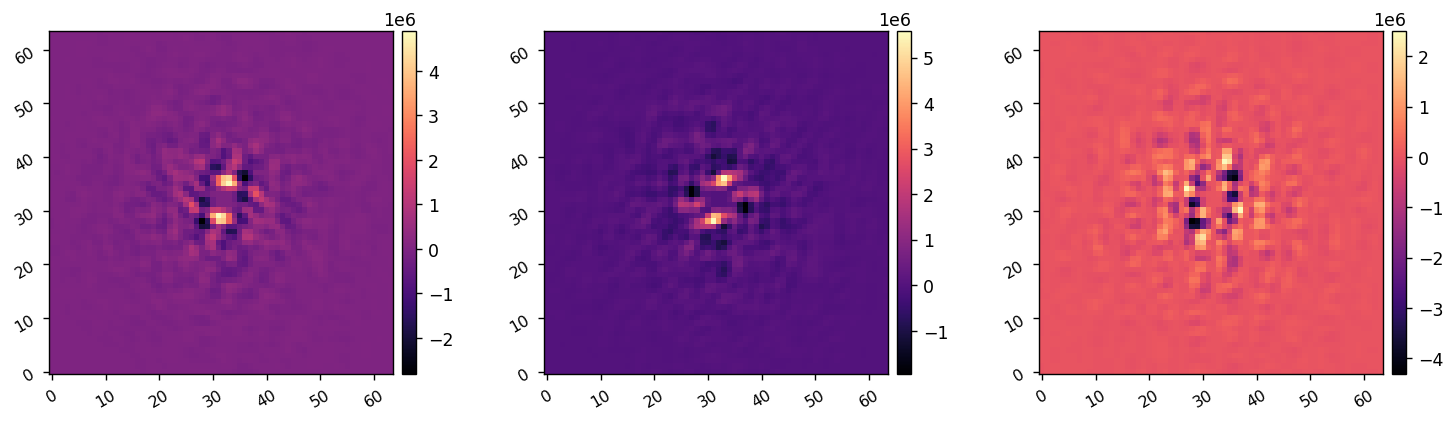

In [32]:
reload(wfsc.iefc_2dm)

probe_amp = 5e-8
calib_amp = 5e-9

# c.texp = 1

c.reset_dms()

differential_images, single_images = wfsc.iefc_2dm.take_measurement(c, 
                                                                   probe_modes, probe_amp, 
                                                                   return_all=True)
ims = differential_images.reshape(3, c.npsf, c.npsf)
wfsc.imshow3(ims[0], ims[1], ims[0]-ims[1], wspace=0.35)

In [33]:
reload(wfsc.iefc_2dm)
response_matrix, response_cube = wfsc.iefc_2dm.calibrate(c, 
                                                         control_mask.ravel(),
                                                         probe_amp, probe_modes, 
                                                         calib_amp, fourier_modes, 
                                                         return_all=True)

Calibrating I-EFC...
	Calibrated mode 1 / 396 in 3.808s
	Calibrated mode 2 / 396 in 7.617s
	Calibrated mode 3 / 396 in 11.447s
	Calibrated mode 4 / 396 in 15.303s
	Calibrated mode 5 / 396 in 19.111s
	Calibrated mode 6 / 396 in 22.905s
	Calibrated mode 7 / 396 in 26.695s
	Calibrated mode 8 / 396 in 30.539s
	Calibrated mode 9 / 396 in 34.353s
	Calibrated mode 10 / 396 in 38.146s
	Calibrated mode 11 / 396 in 41.949s
	Calibrated mode 12 / 396 in 47.337s
	Calibrated mode 13 / 396 in 51.202s
	Calibrated mode 14 / 396 in 55.064s
	Calibrated mode 15 / 396 in 58.928s
	Calibrated mode 16 / 396 in 62.794s
	Calibrated mode 17 / 396 in 66.660s
	Calibrated mode 18 / 396 in 70.526s
	Calibrated mode 19 / 396 in 74.391s
	Calibrated mode 20 / 396 in 78.256s
	Calibrated mode 21 / 396 in 82.120s
	Calibrated mode 22 / 396 in 85.987s
	Calibrated mode 23 / 396 in 89.851s
	Calibrated mode 24 / 396 in 93.713s
	Calibrated mode 25 / 396 in 97.578s
	Calibrated mode 26 / 396 in 101.445s
	Calibrated mode 27 / 396 i

	Calibrated mode 214 / 396 in 832.465s
	Calibrated mode 215 / 396 in 836.379s
	Calibrated mode 216 / 396 in 840.293s
	Calibrated mode 217 / 396 in 844.203s
	Calibrated mode 218 / 396 in 848.121s
	Calibrated mode 219 / 396 in 852.034s
	Calibrated mode 220 / 396 in 855.946s
	Calibrated mode 221 / 396 in 859.858s
	Calibrated mode 222 / 396 in 863.772s
	Calibrated mode 223 / 396 in 867.685s
	Calibrated mode 224 / 396 in 871.595s
	Calibrated mode 225 / 396 in 875.509s
	Calibrated mode 226 / 396 in 879.422s
	Calibrated mode 227 / 396 in 883.334s
	Calibrated mode 228 / 396 in 887.246s
	Calibrated mode 229 / 396 in 891.159s
	Calibrated mode 230 / 396 in 895.072s
	Calibrated mode 231 / 396 in 898.982s
	Calibrated mode 232 / 396 in 902.894s
	Calibrated mode 233 / 396 in 906.806s
	Calibrated mode 234 / 396 in 910.718s
	Calibrated mode 235 / 396 in 914.629s
	Calibrated mode 236 / 396 in 918.544s
	Calibrated mode 237 / 396 in 922.456s
	Calibrated mode 238 / 396 in 926.369s
	Calibrated mode 239 / 39

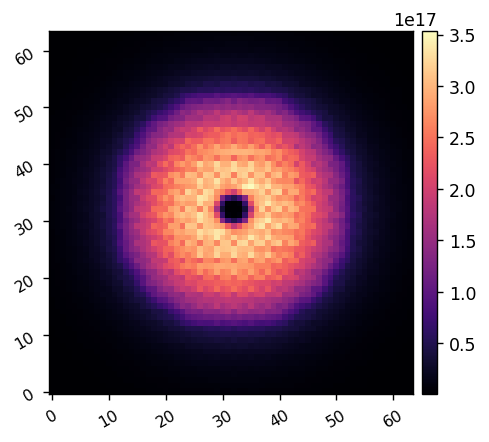

In [34]:
response_sum = np.sum(abs(response_cube), axis=(0,1))
misc.imshow1(response_sum.reshape(c.npsf,c.npsf))

In [36]:
misc.save_fits('hcipy_iefc_2dm_response_matrix.fits', response_matrix)
misc.save_fits('hcipy_iefc_2dm_response_cube.fits', response_cube)

Saved data to:  hcipy_iefc_2dm_response_matrix.fits
Saved data to:  hcipy_iefc_2dm_response_cube.fits


Running I-EFC...
	Closed-loop iteration 1 / 10


(792,)

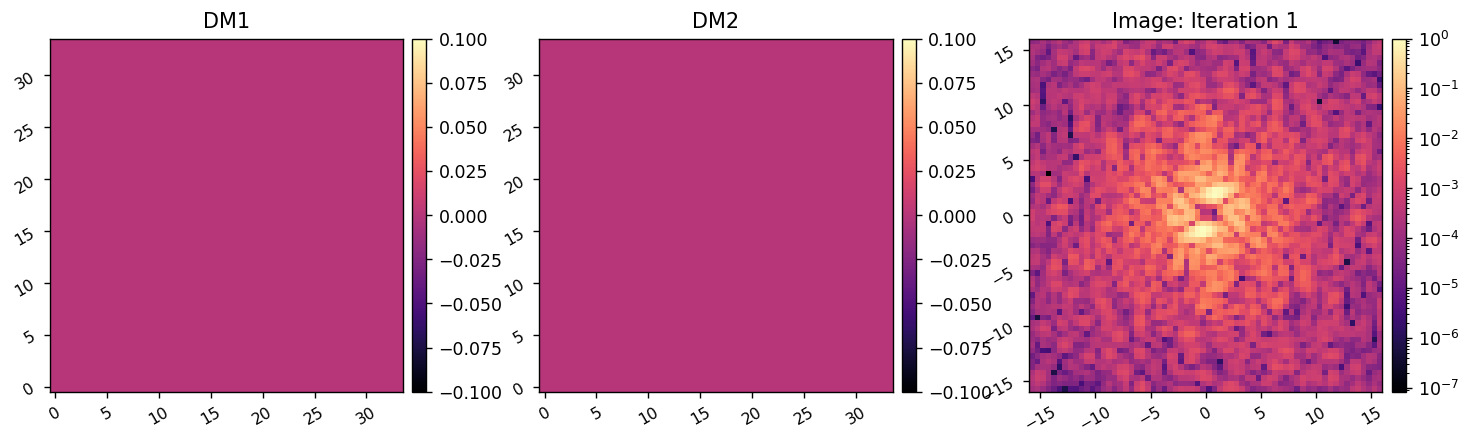

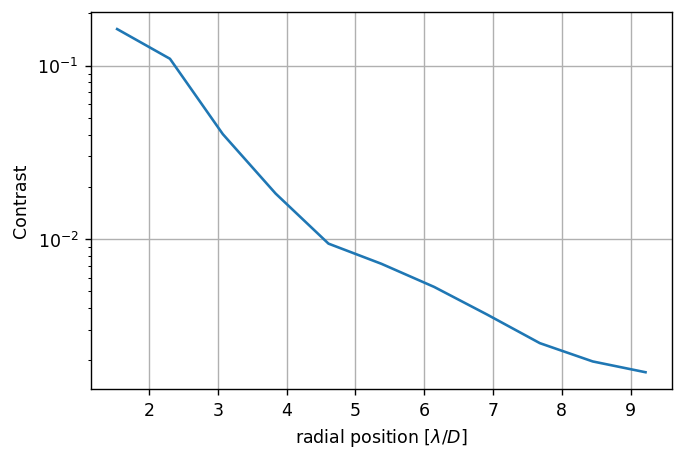

	Closed-loop iteration 2 / 10


(792,)

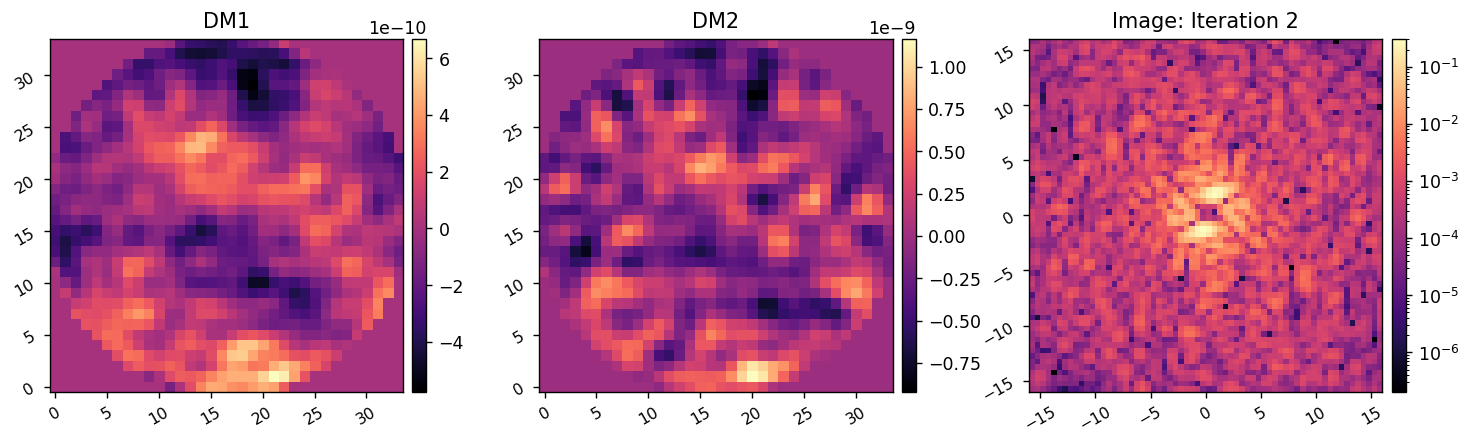

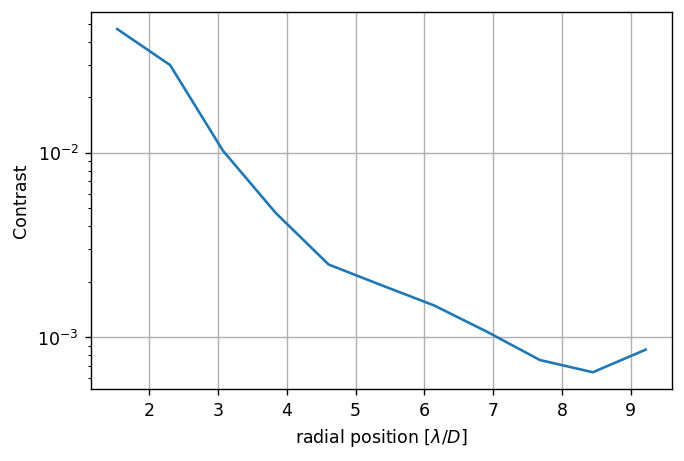

	Closed-loop iteration 3 / 10


(792,)

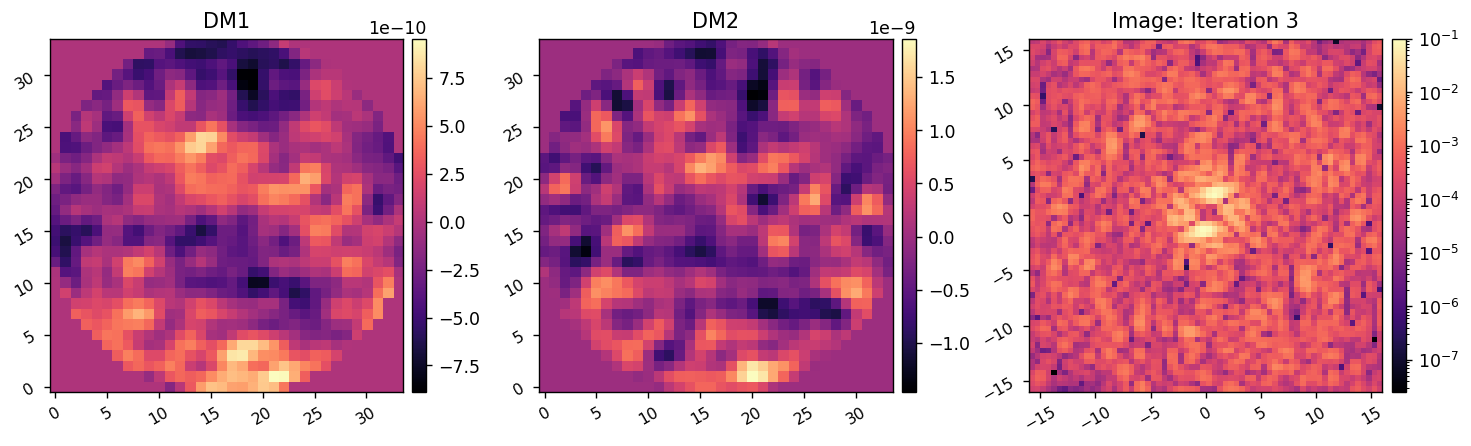

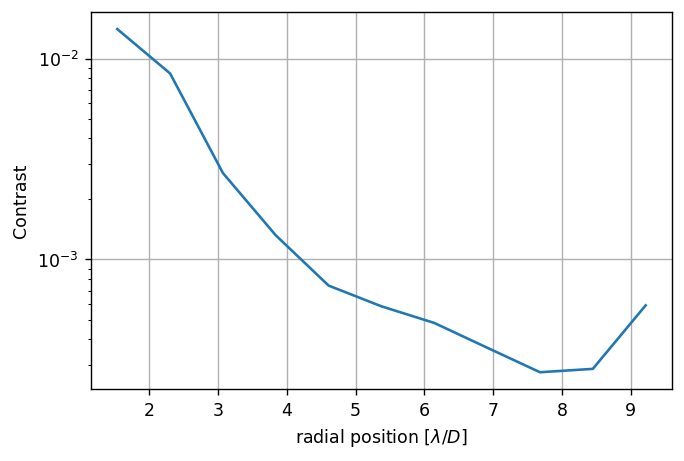

	Closed-loop iteration 4 / 10


(792,)

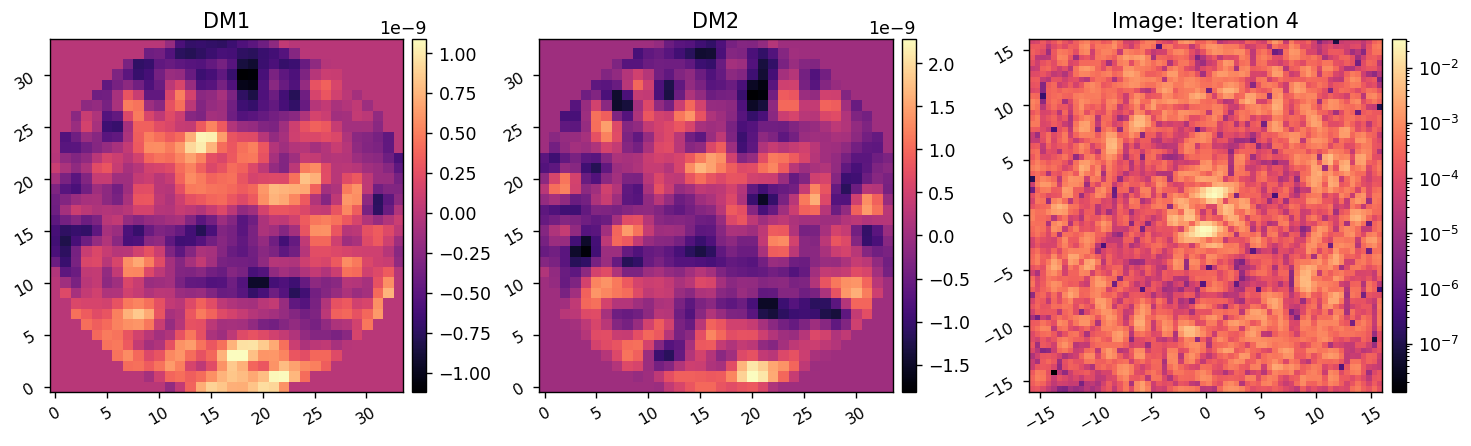

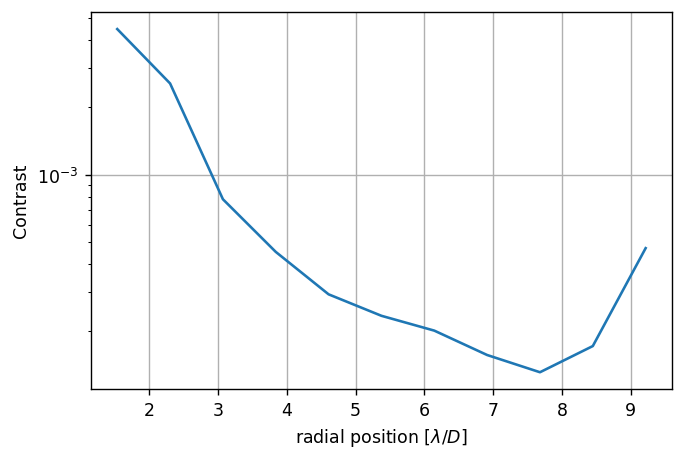

	Closed-loop iteration 5 / 10


(792,)

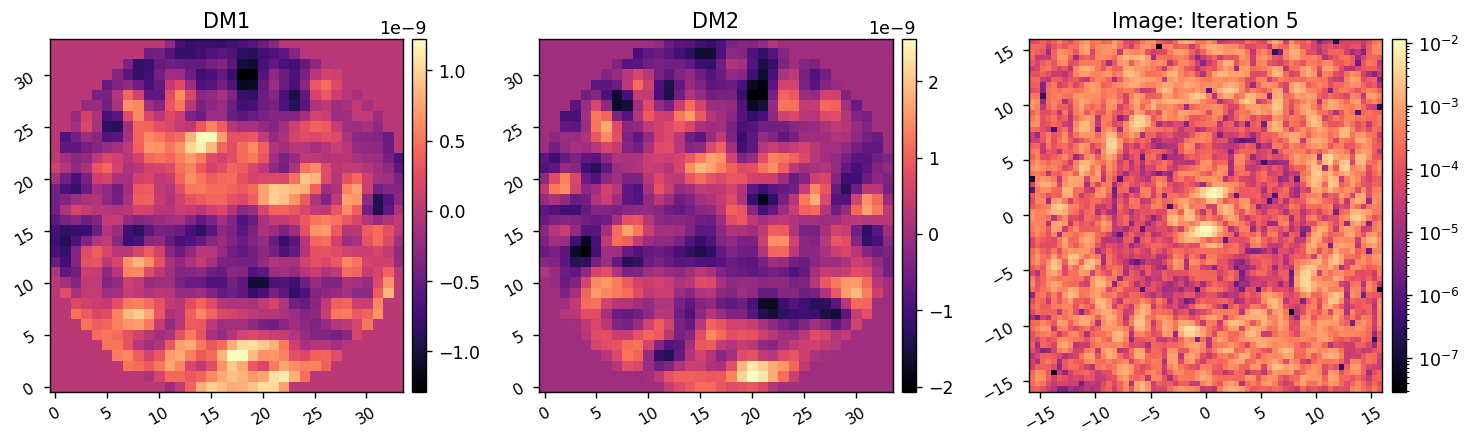

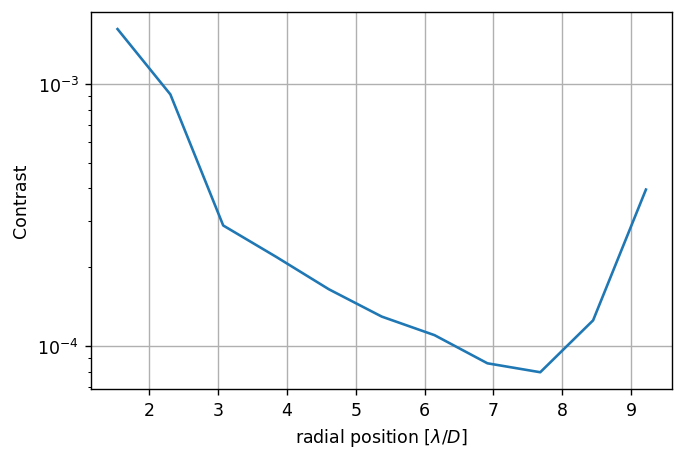

	Closed-loop iteration 6 / 10


(792,)

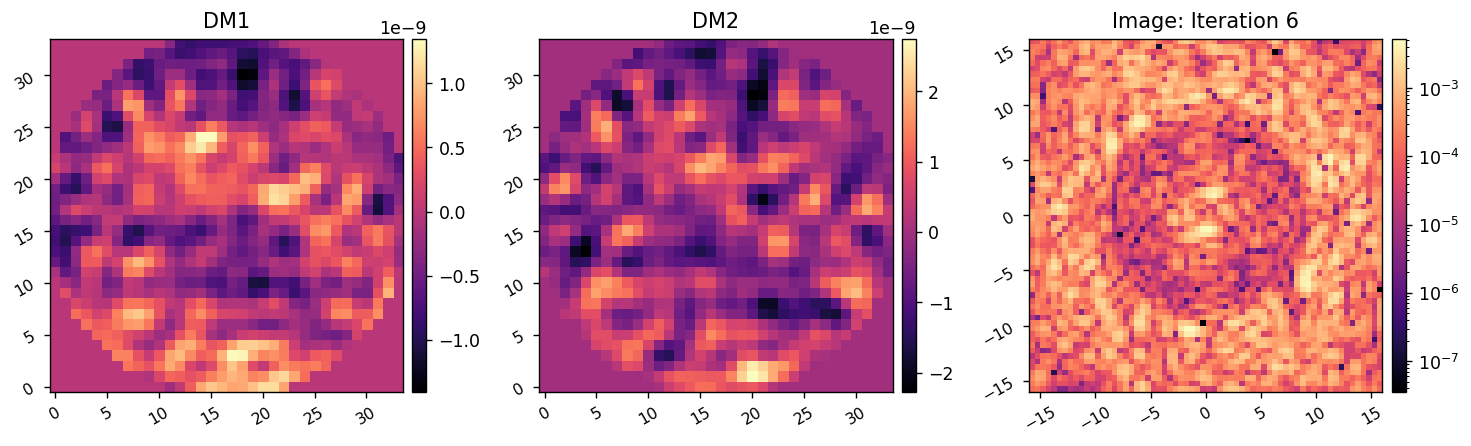

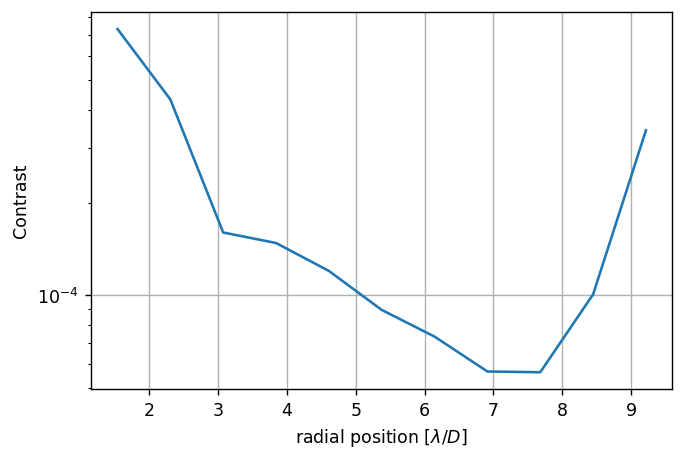

	Closed-loop iteration 7 / 10


(792,)

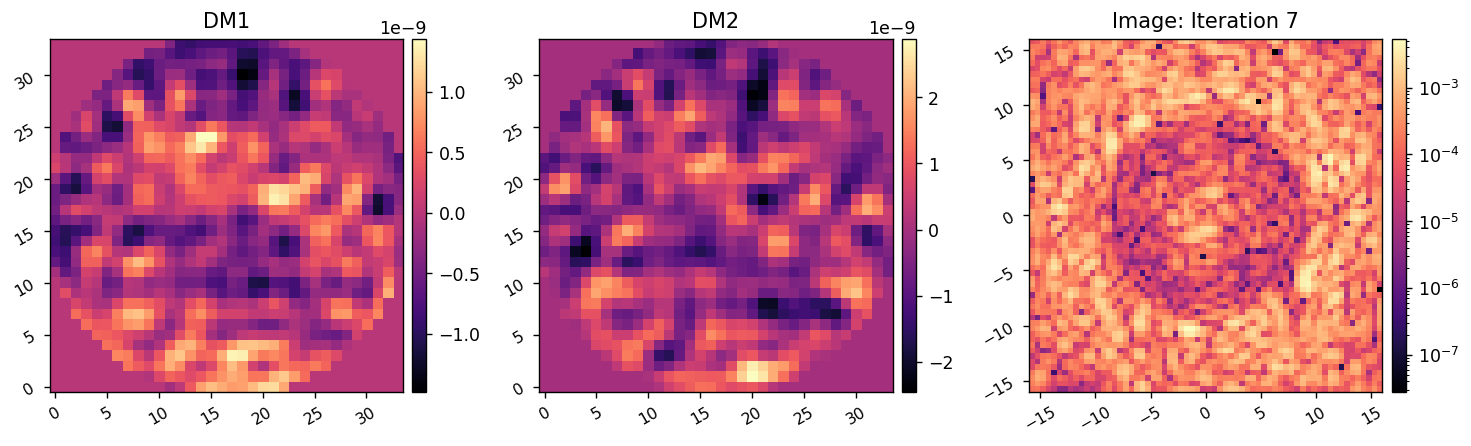

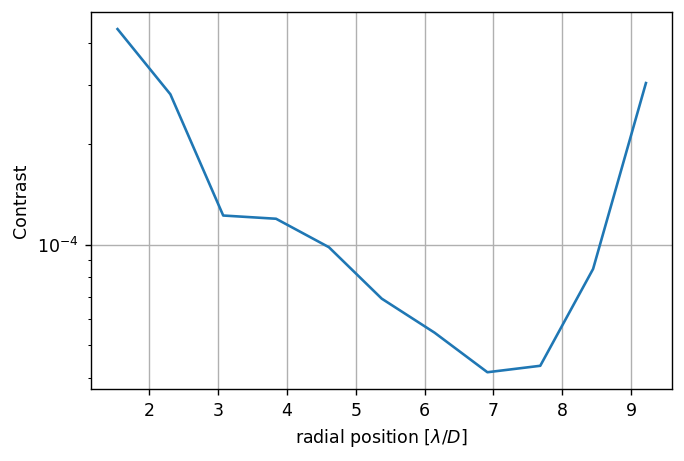

	Closed-loop iteration 8 / 10


(792,)

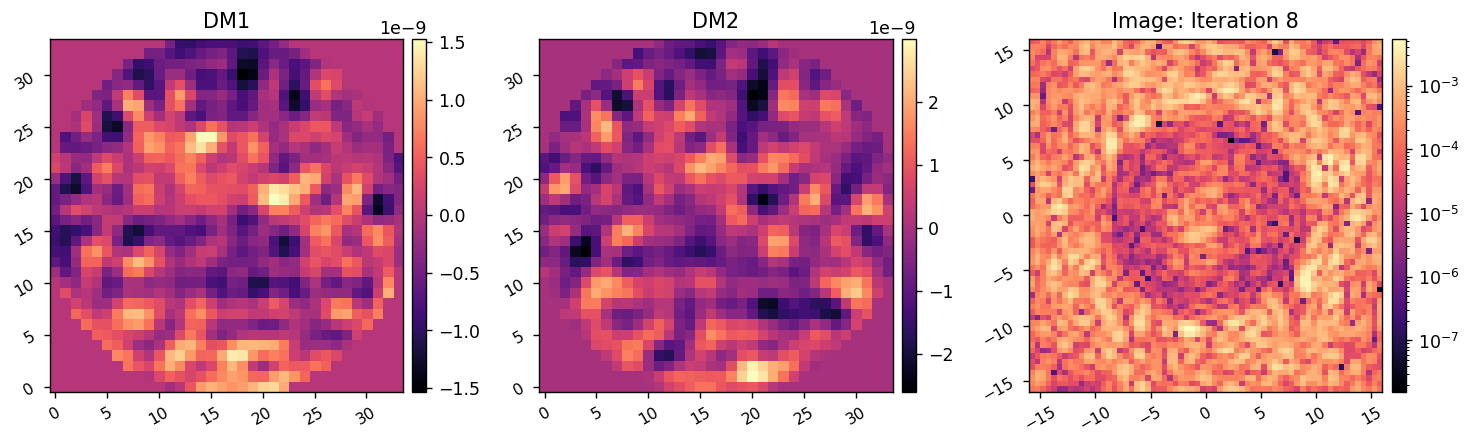

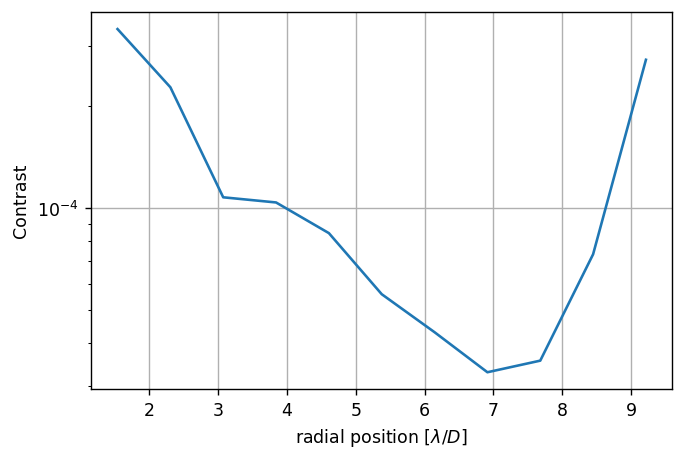

	Closed-loop iteration 9 / 10


(792,)

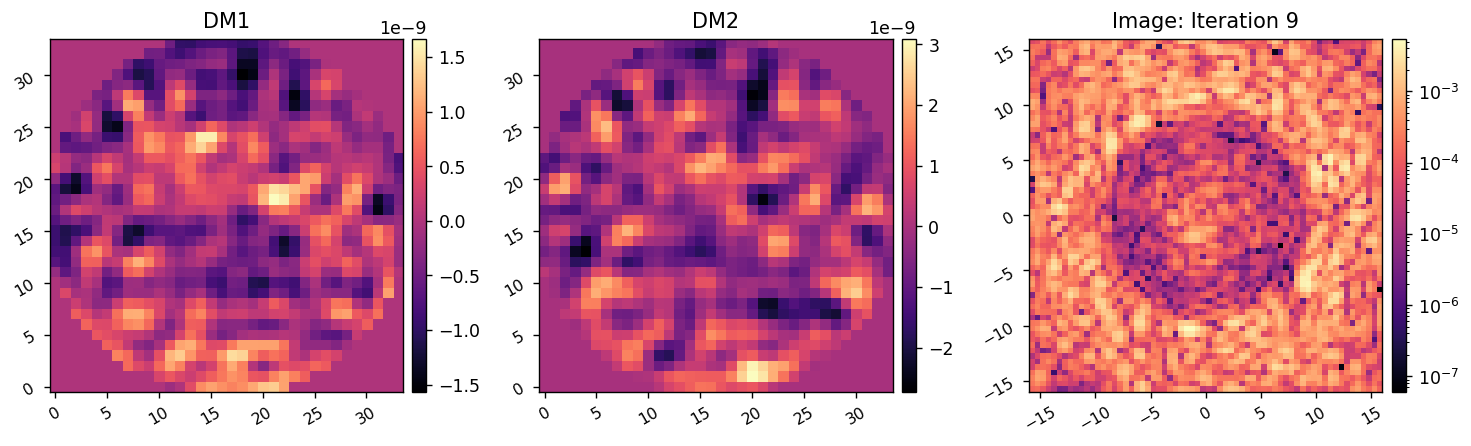

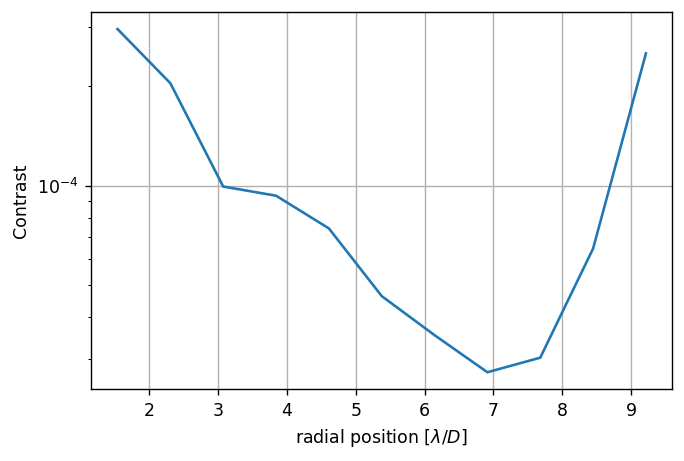

	Closed-loop iteration 10 / 10


(792,)

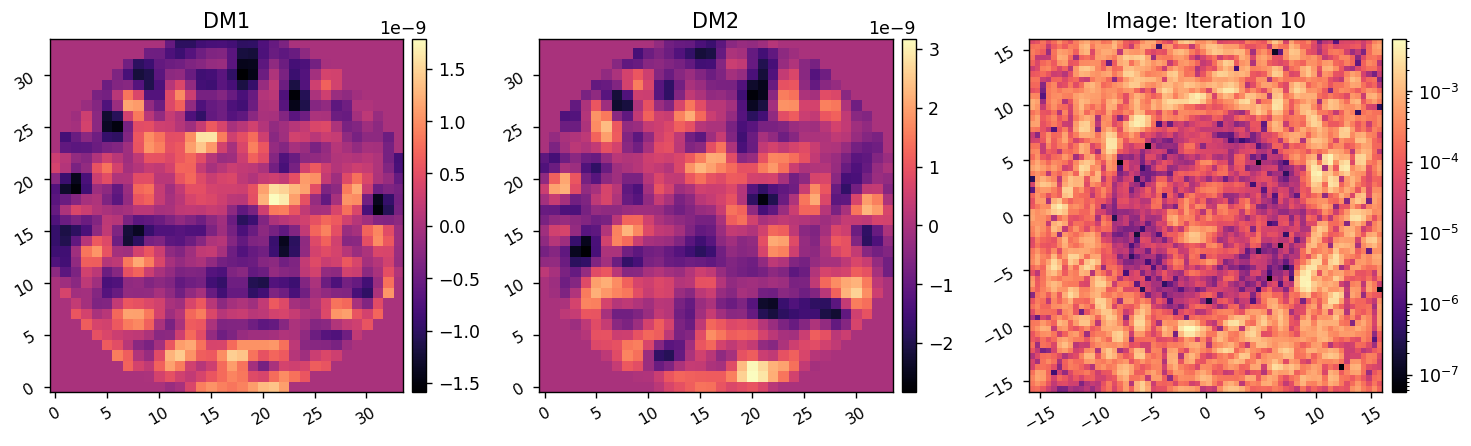

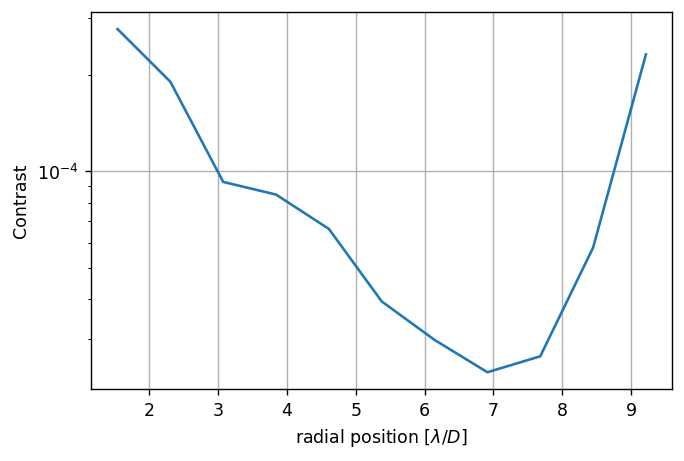

I-EFC loop completed in 20.328s.
Running I-EFC...
	Closed-loop iteration 1 / 20


(792,)

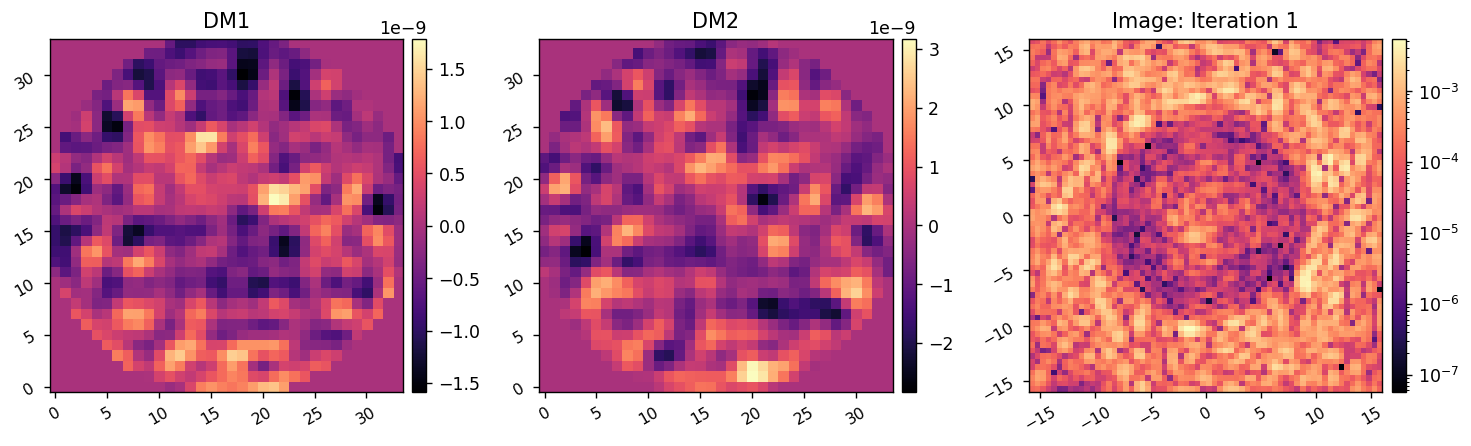

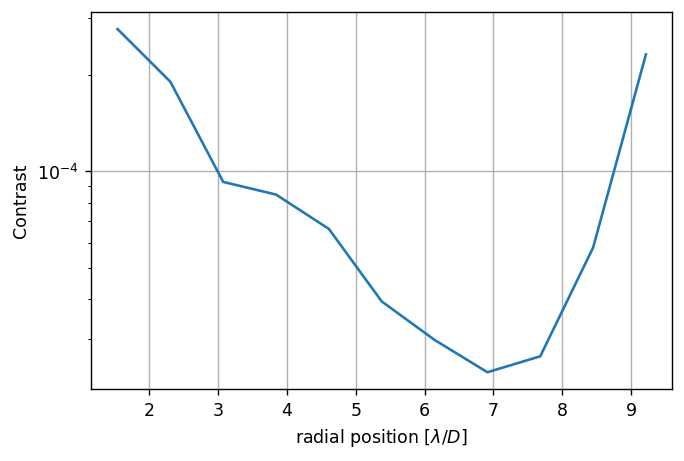

	Closed-loop iteration 2 / 20


(792,)

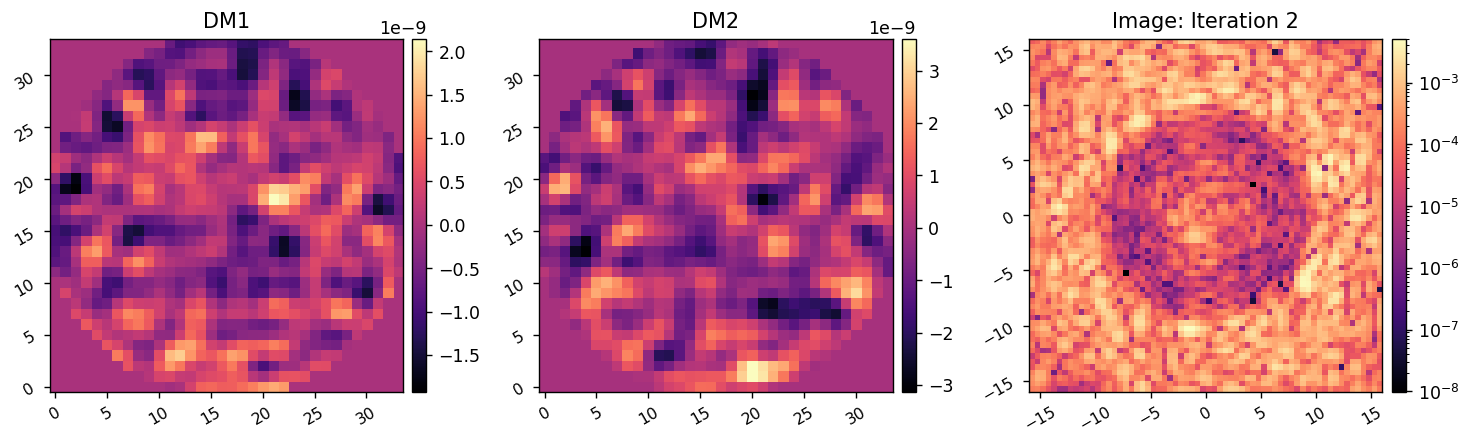

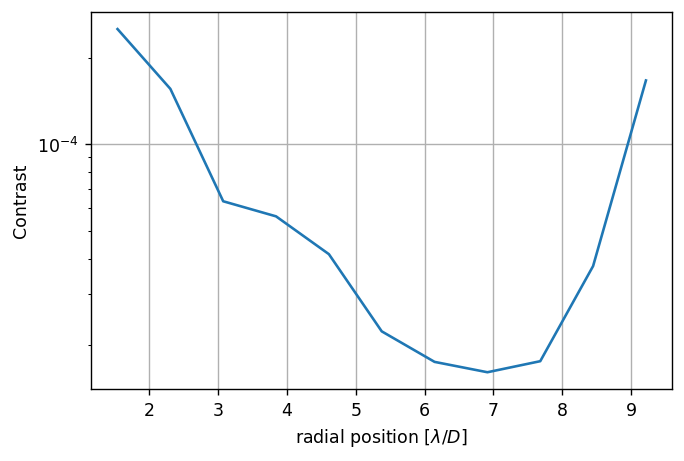

	Closed-loop iteration 3 / 20


(792,)

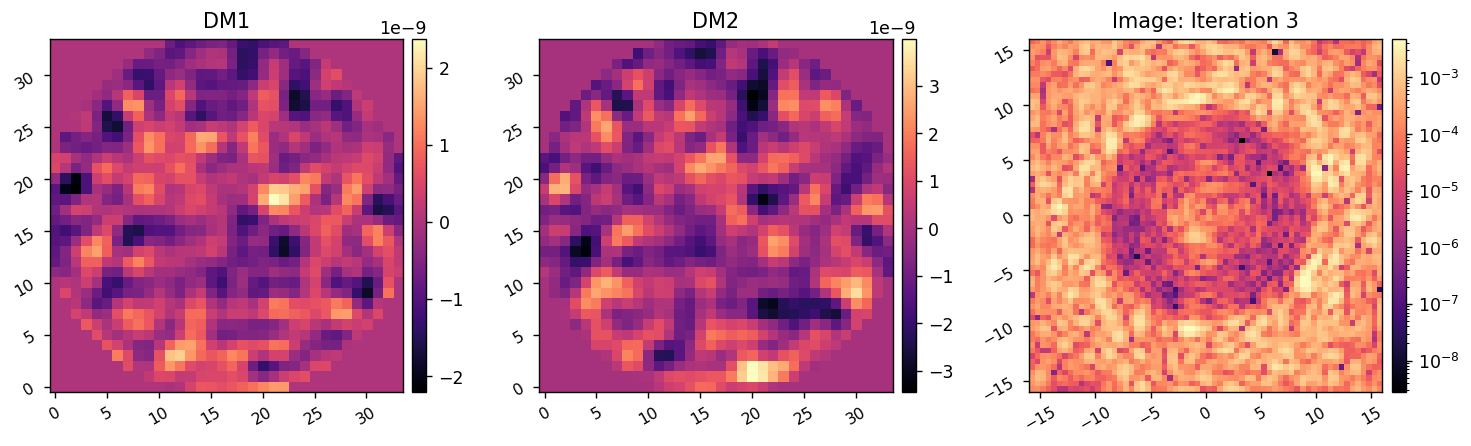

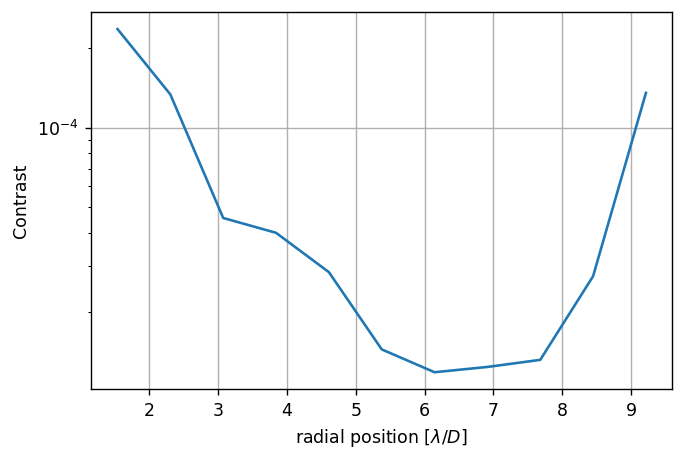

	Closed-loop iteration 4 / 20


(792,)

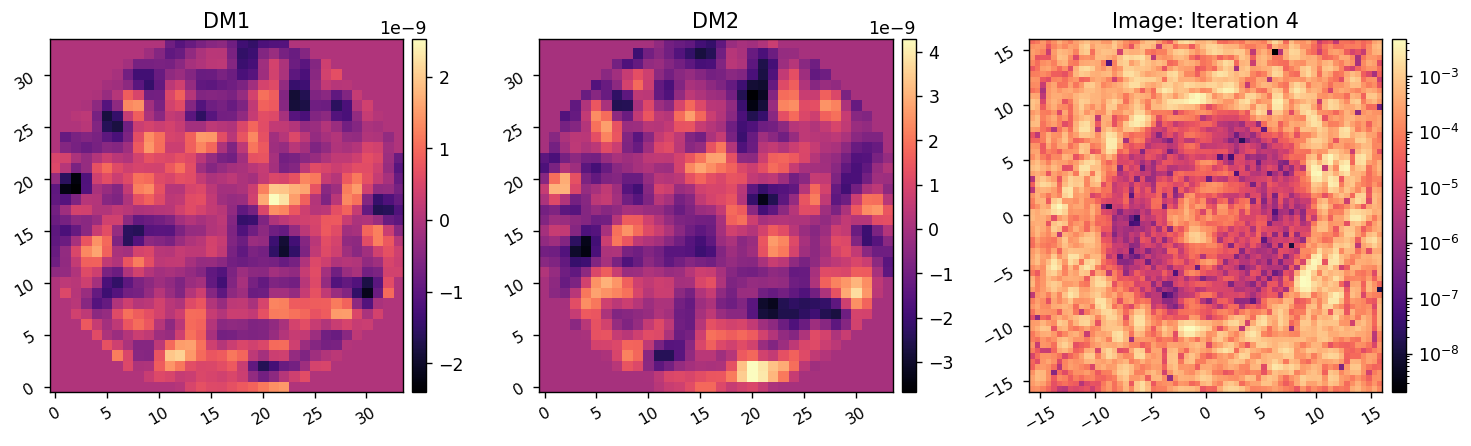

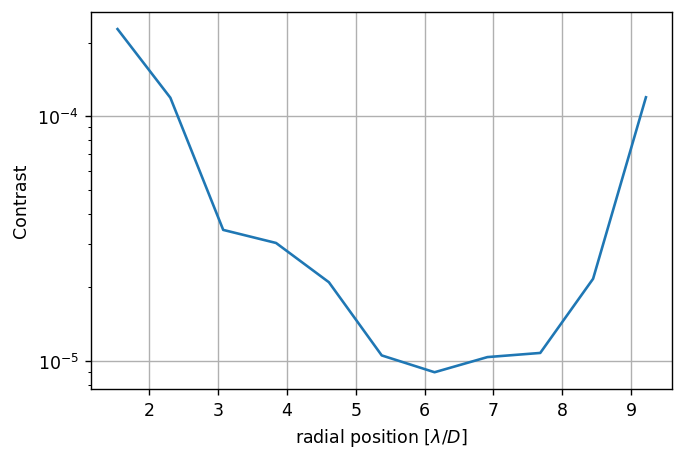

	Closed-loop iteration 5 / 20


(792,)

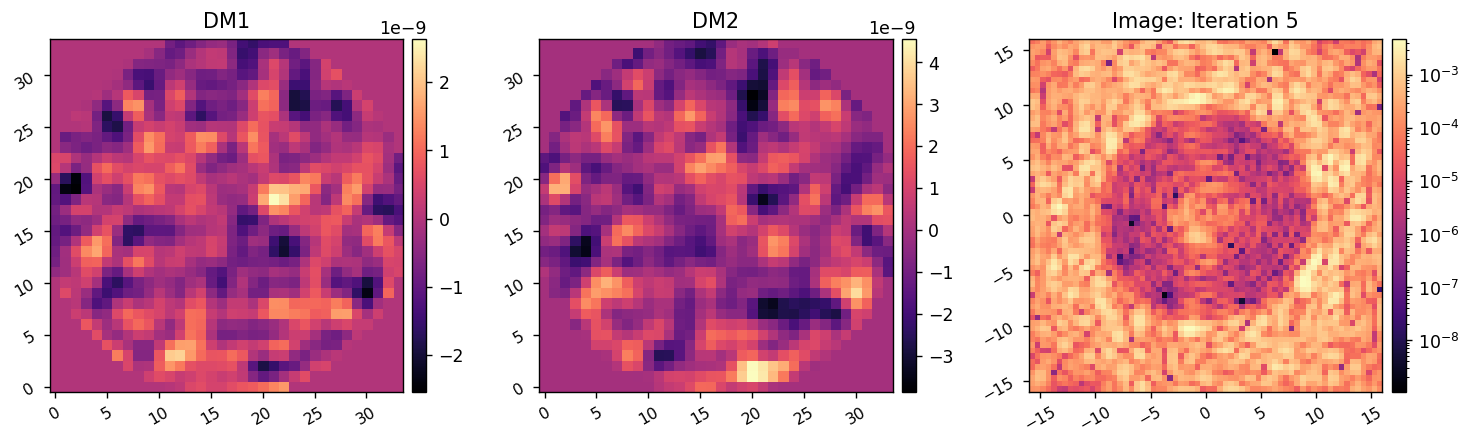

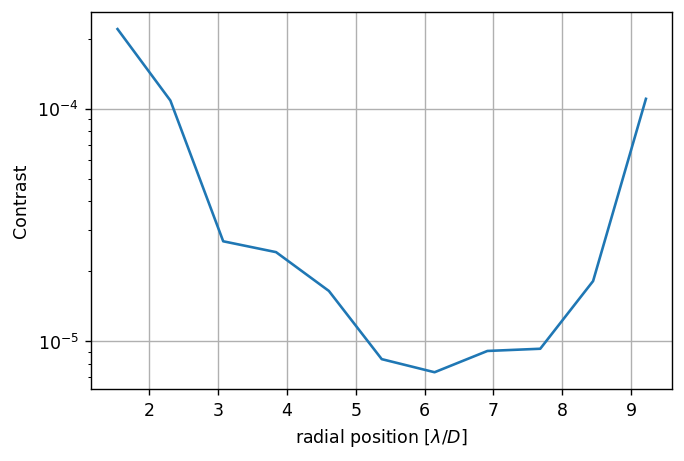

	Closed-loop iteration 6 / 20


(792,)

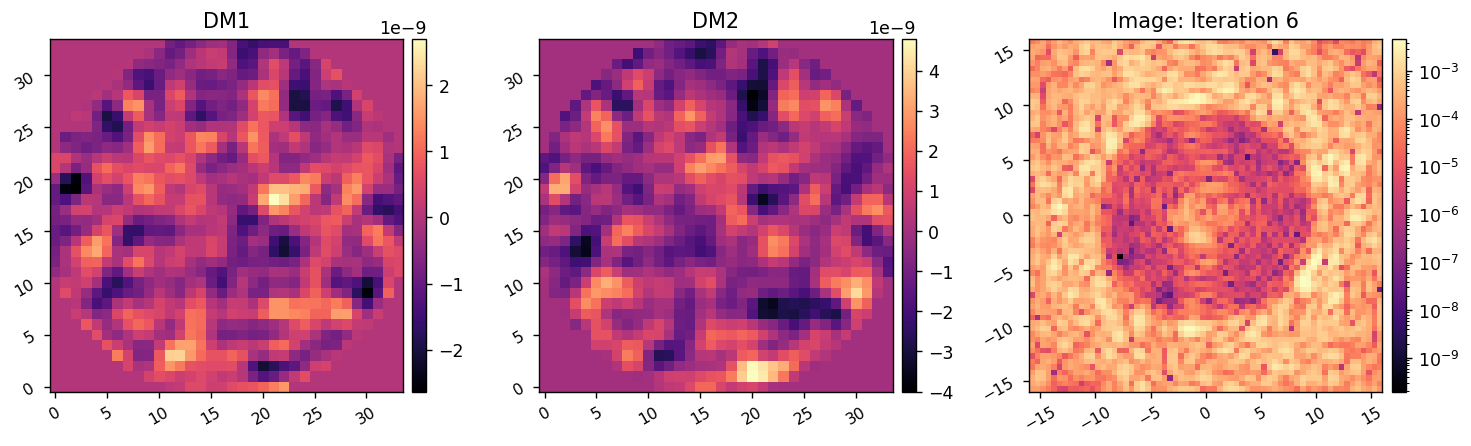

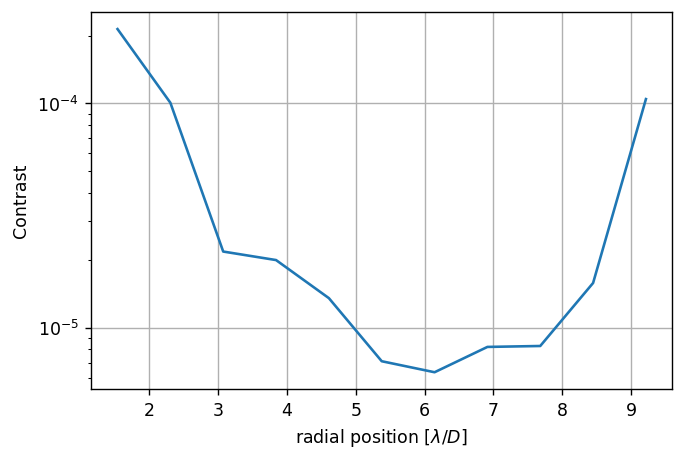

	Closed-loop iteration 7 / 20


(792,)

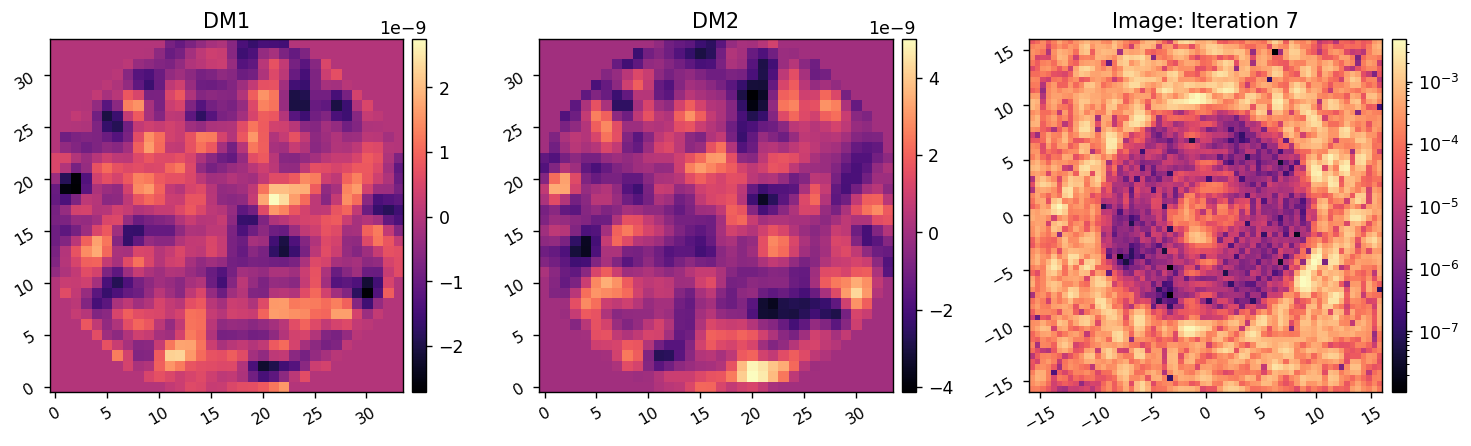

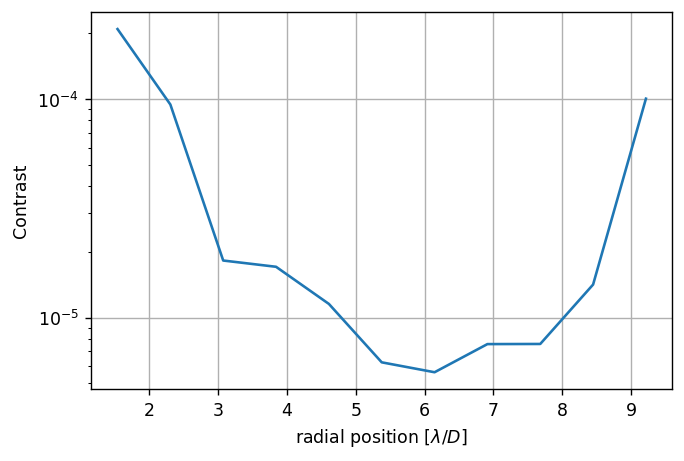

	Closed-loop iteration 8 / 20


(792,)

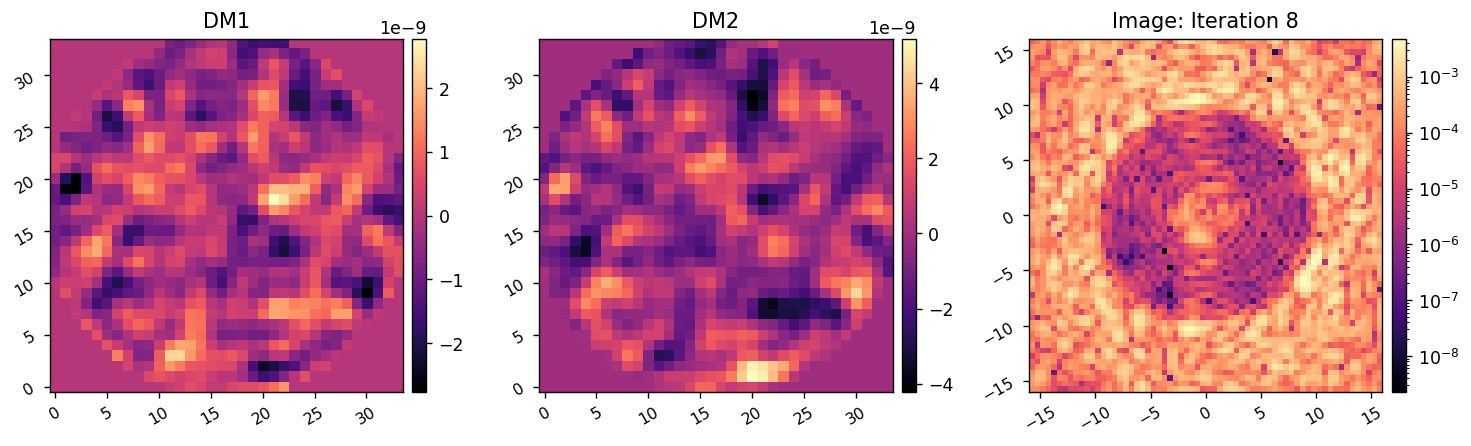

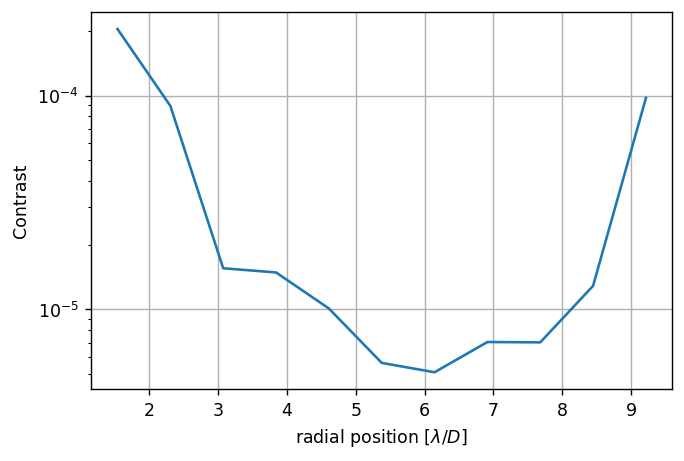

	Closed-loop iteration 9 / 20


(792,)

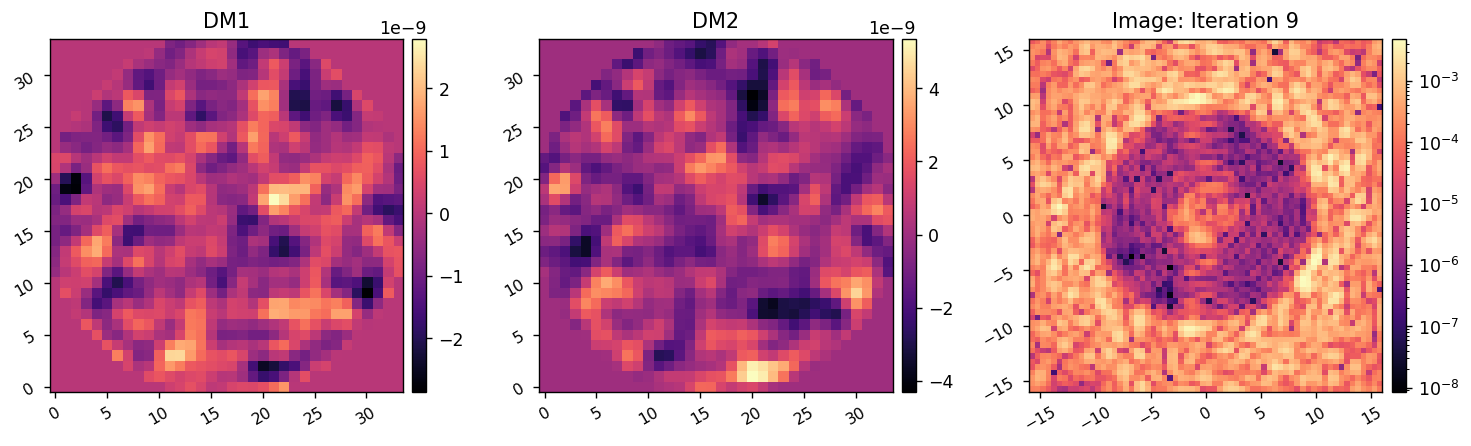

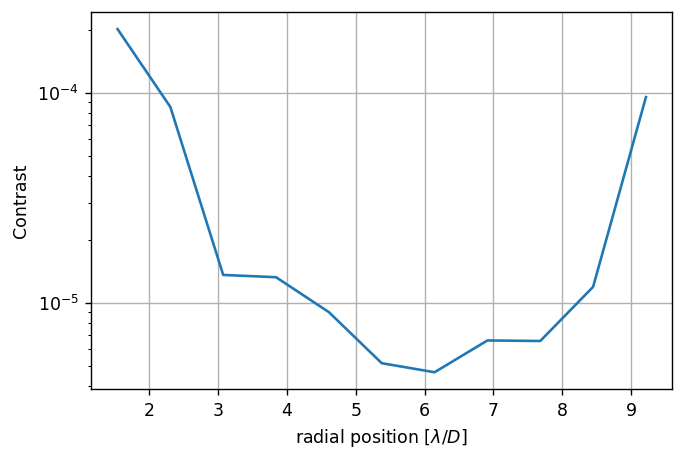

	Closed-loop iteration 10 / 20


(792,)

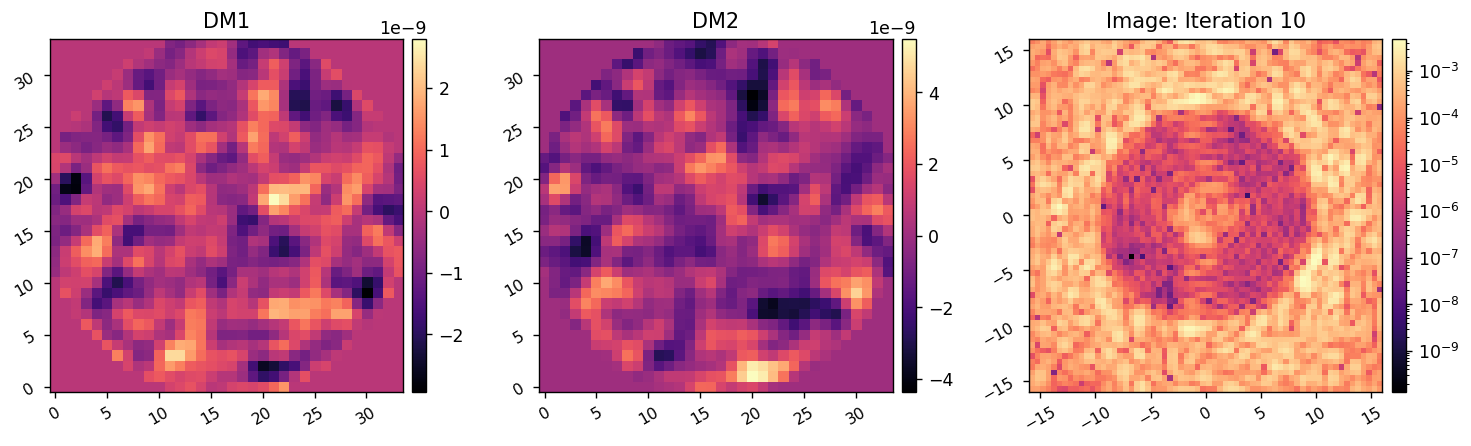

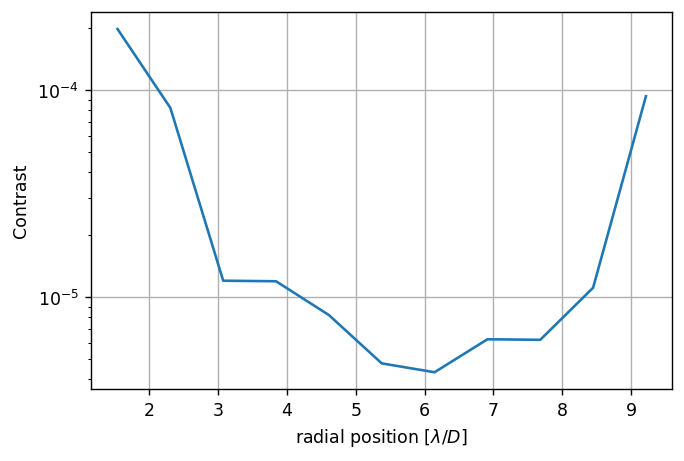

	Closed-loop iteration 11 / 20


(792,)

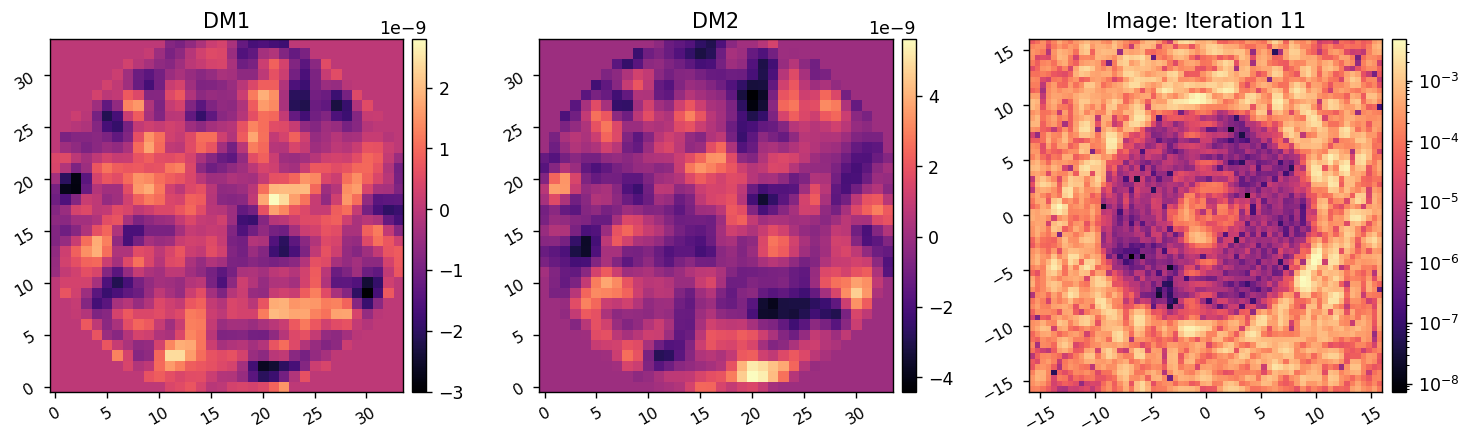

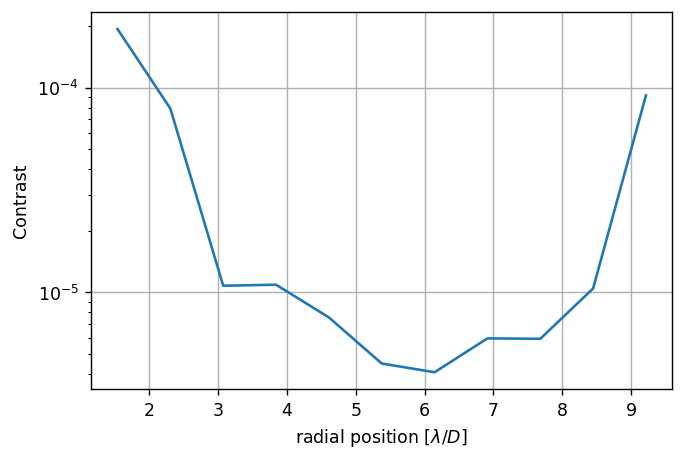

	Closed-loop iteration 12 / 20


(792,)

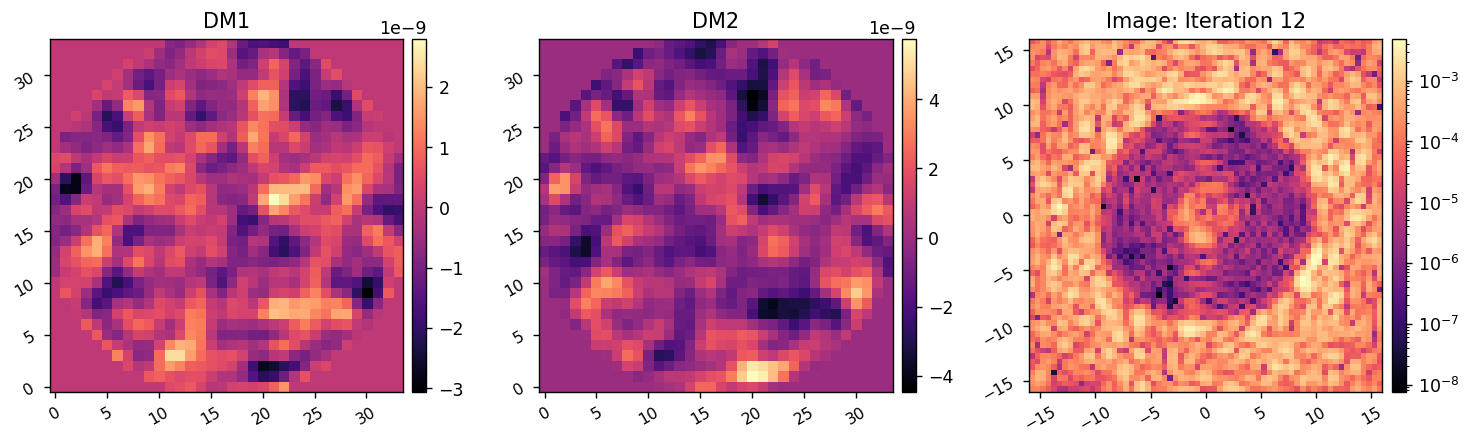

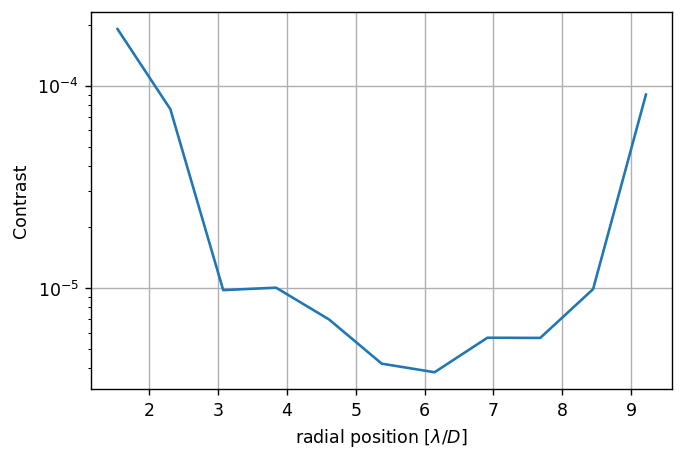

	Closed-loop iteration 13 / 20


(792,)

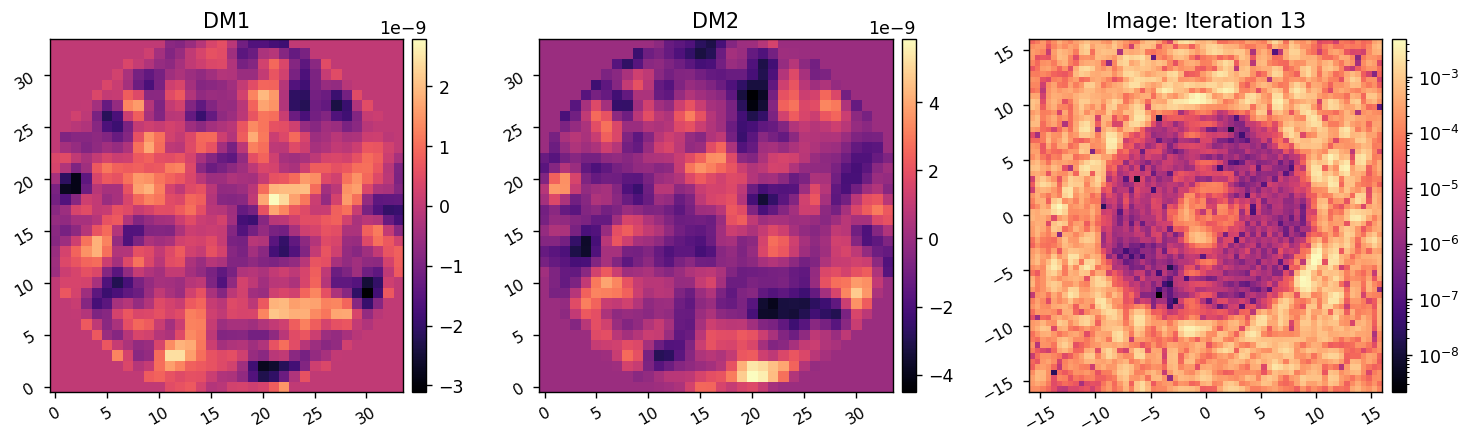

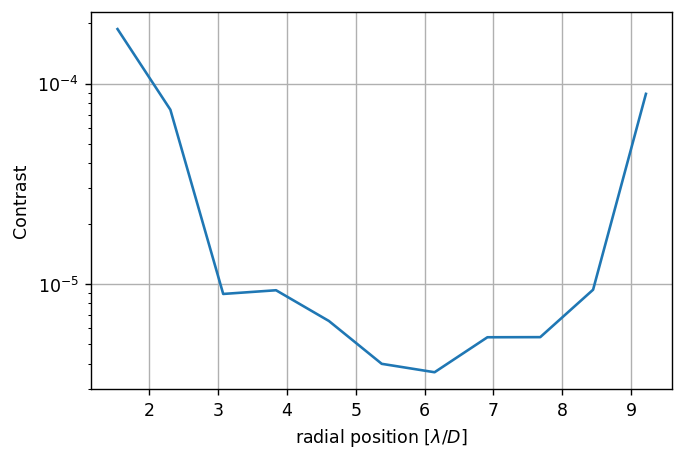

	Closed-loop iteration 14 / 20


(792,)

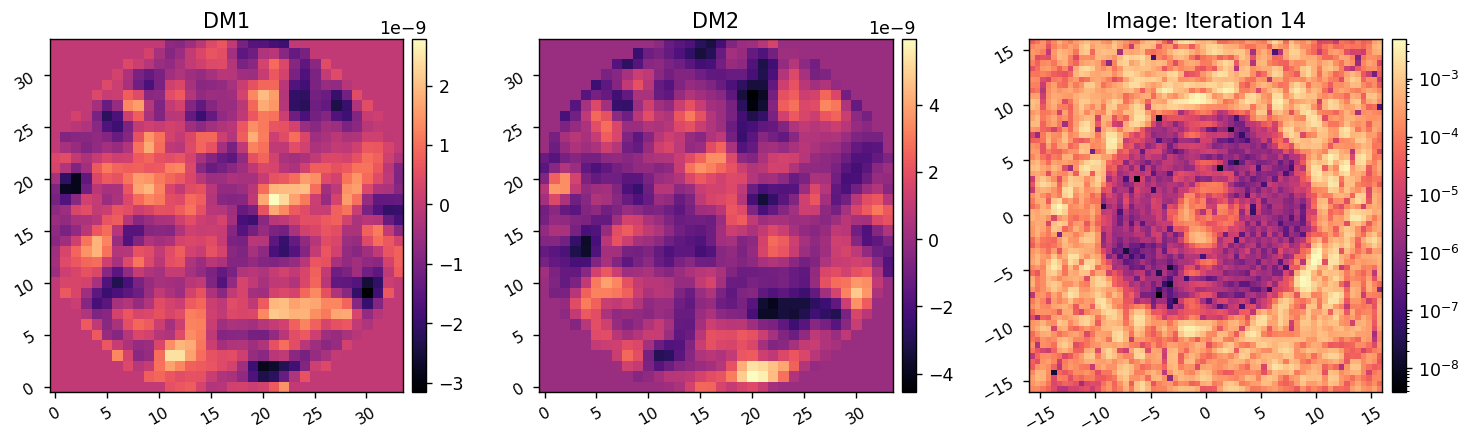

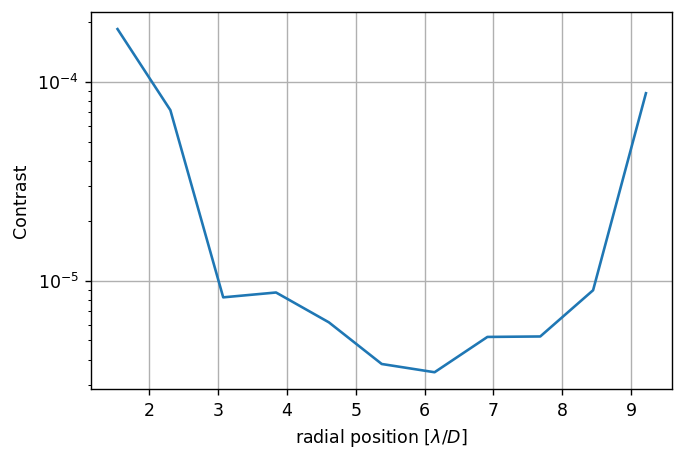

	Closed-loop iteration 15 / 20


(792,)

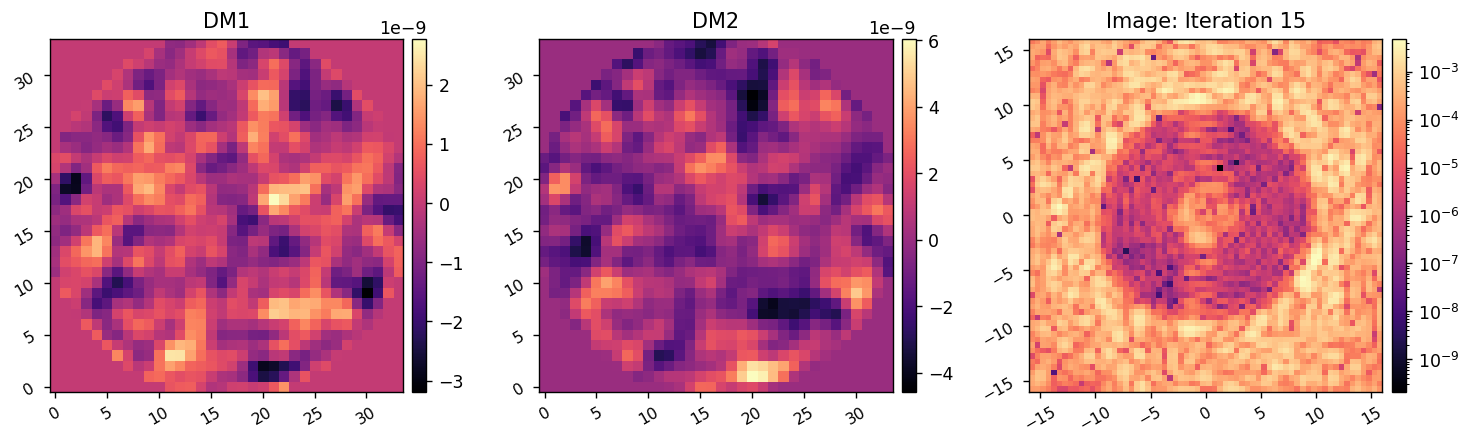

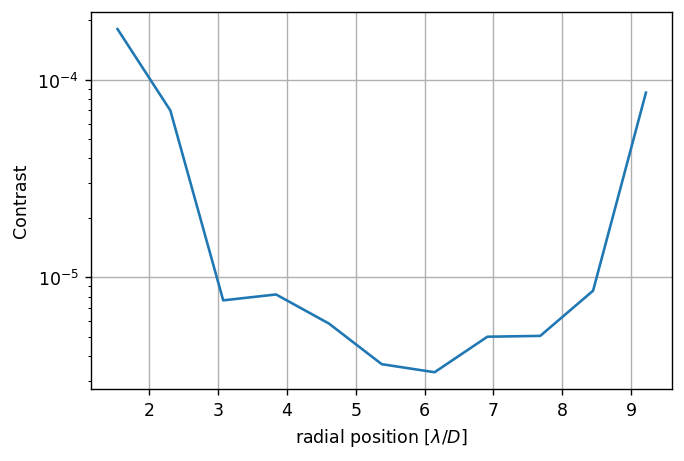

	Closed-loop iteration 16 / 20


(792,)

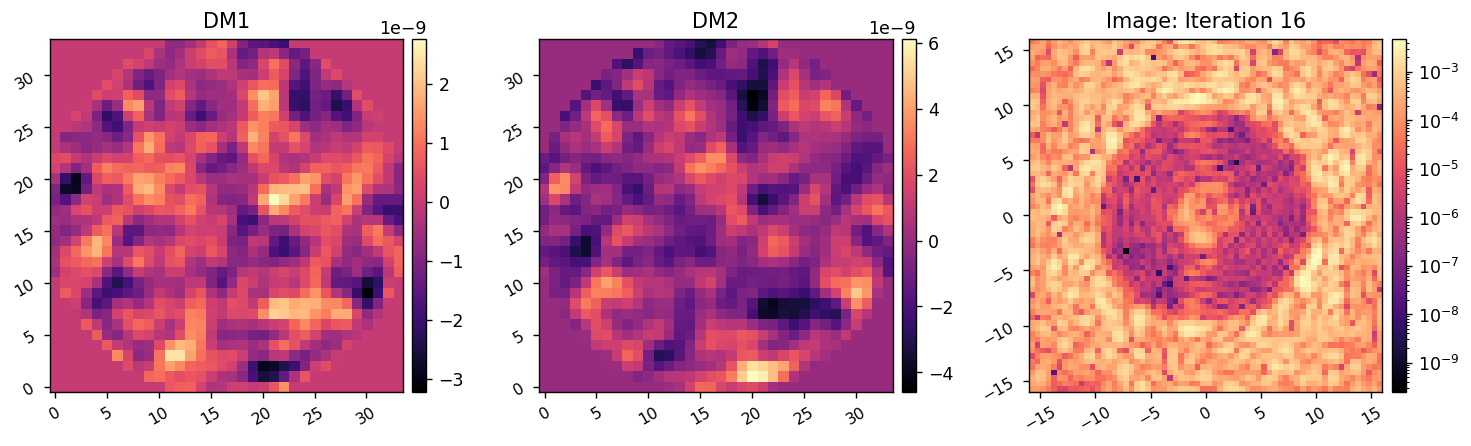

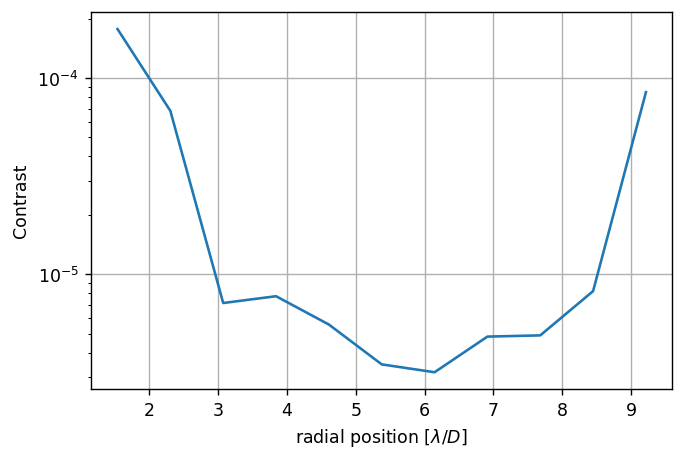

	Closed-loop iteration 17 / 20


(792,)

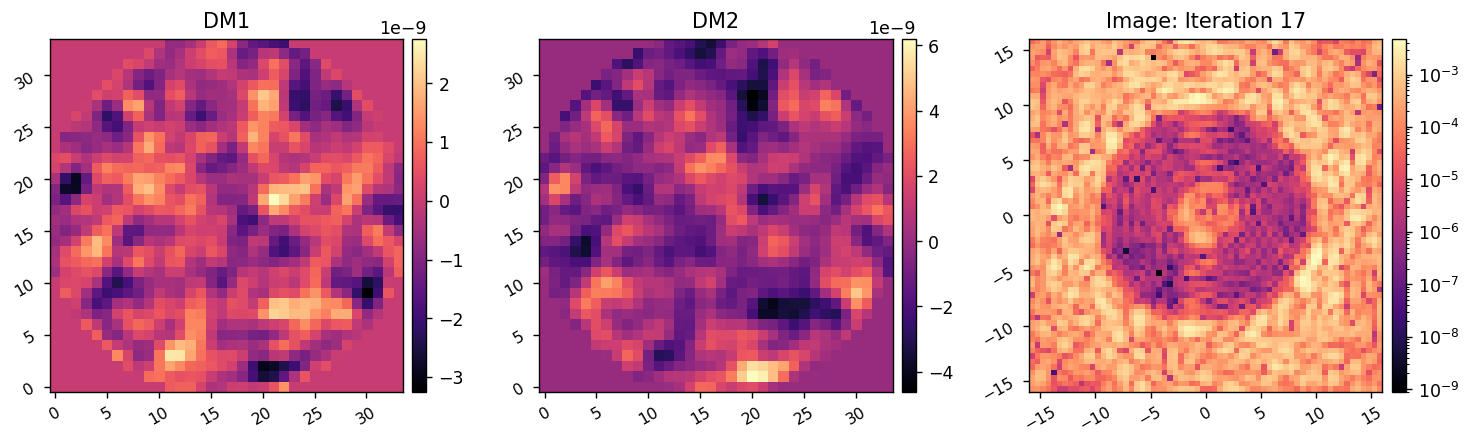

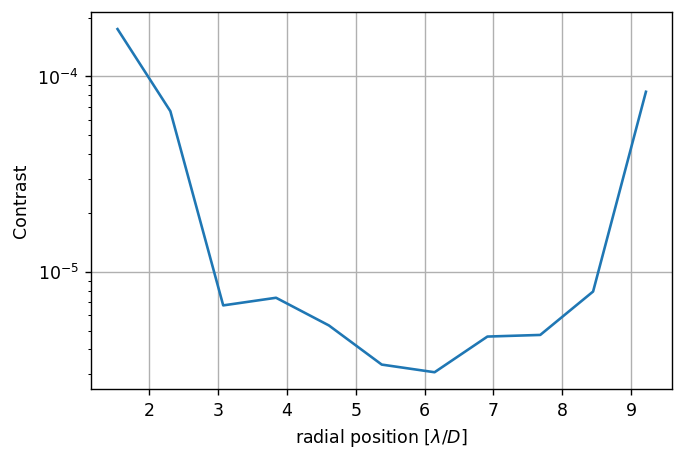

	Closed-loop iteration 18 / 20


(792,)

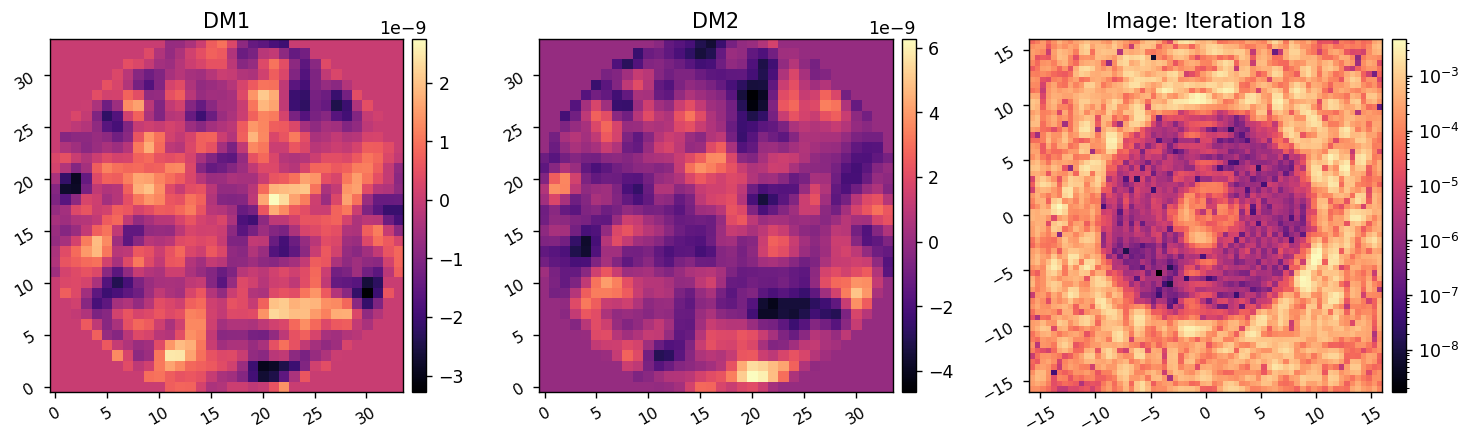

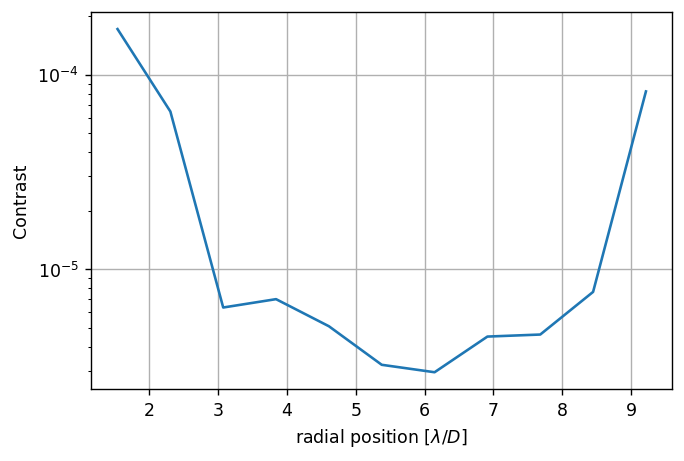

	Closed-loop iteration 19 / 20


(792,)

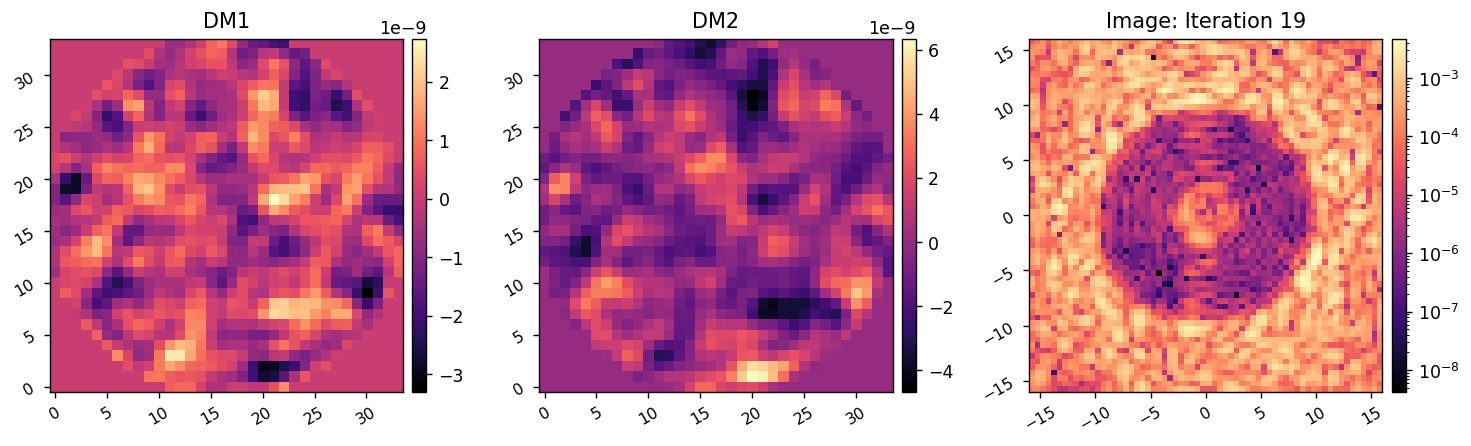

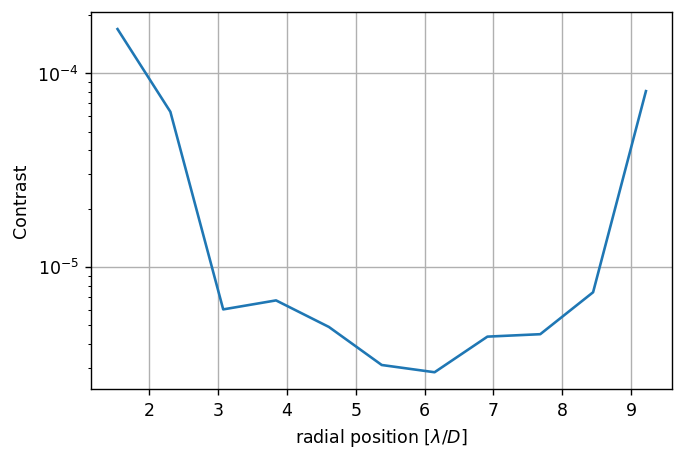

	Closed-loop iteration 20 / 20


(792,)

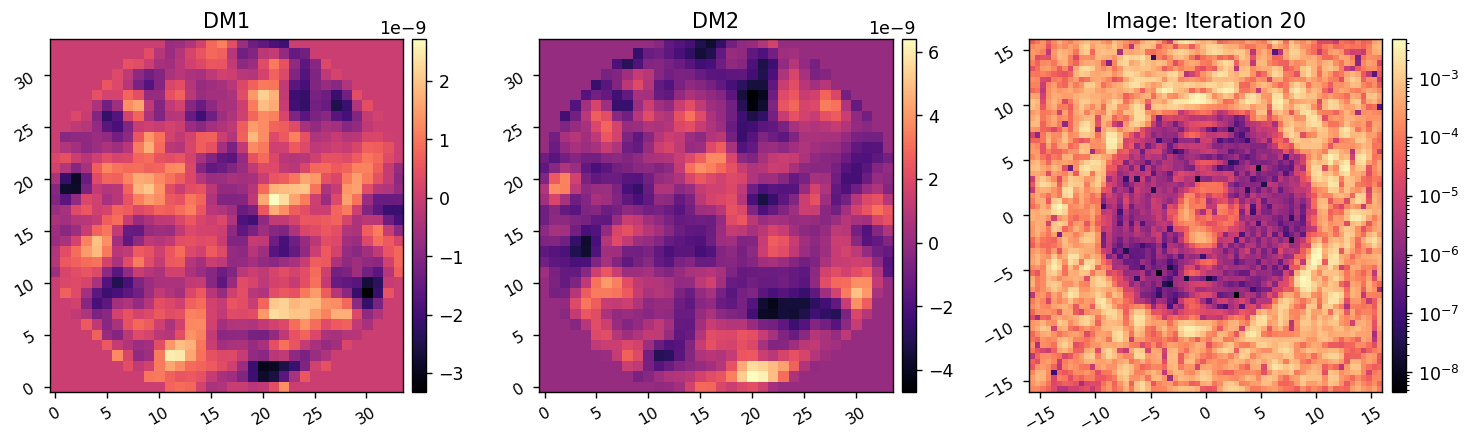

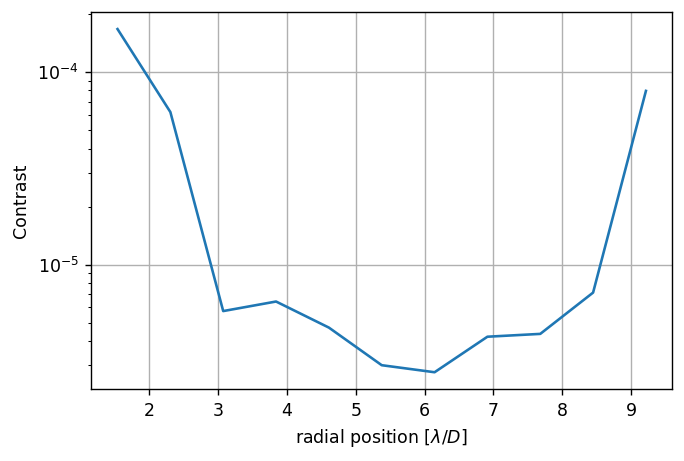

I-EFC loop completed in 40.367s.
Running I-EFC...
	Closed-loop iteration 1 / 20


(792,)

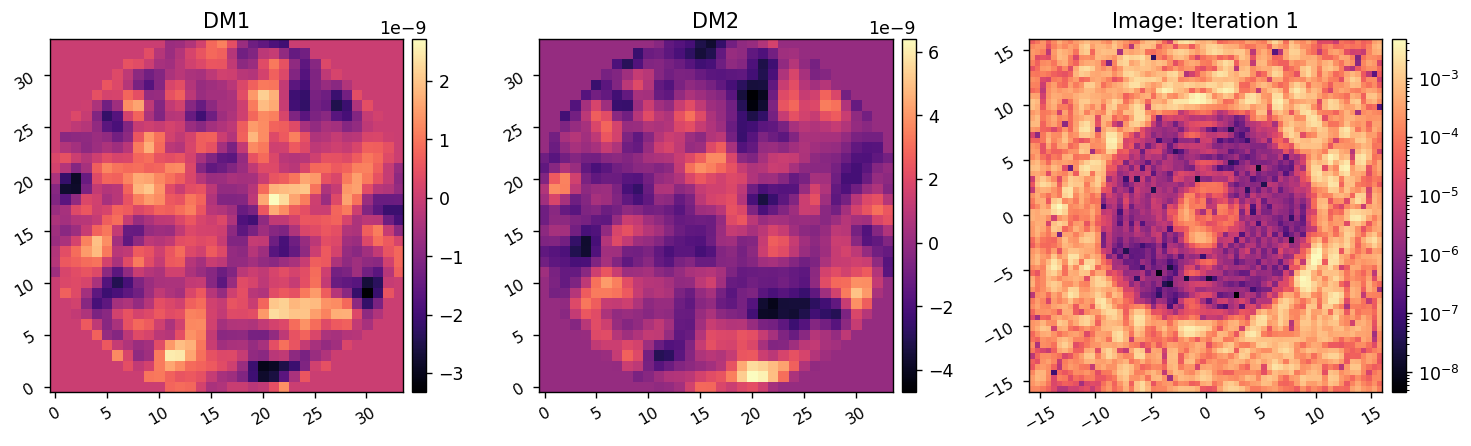

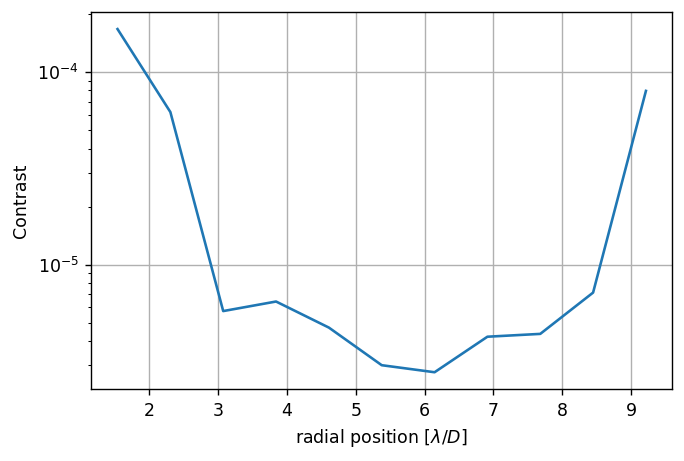

	Closed-loop iteration 2 / 20


(792,)

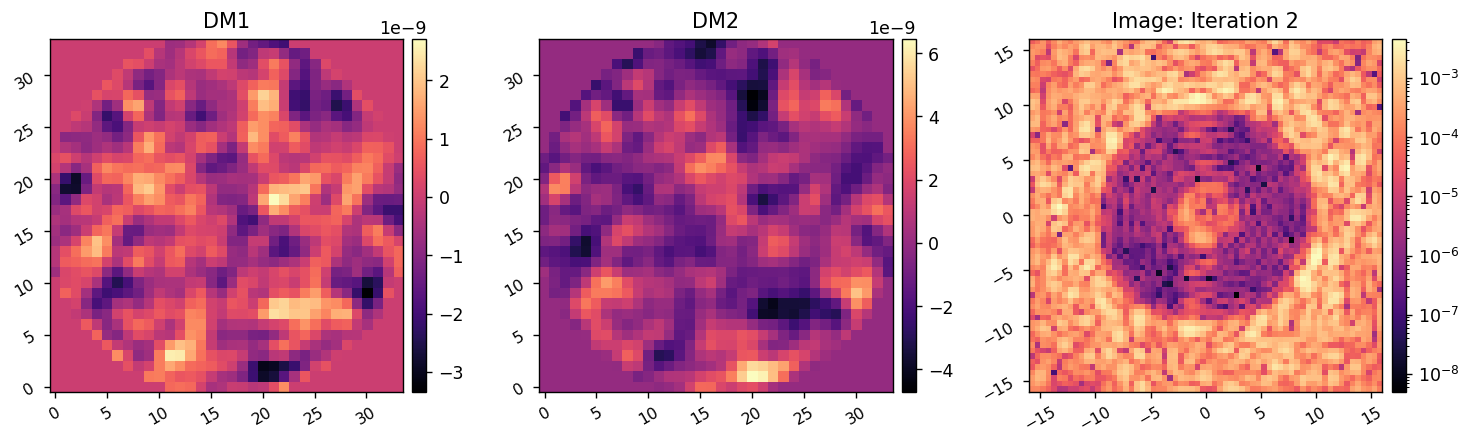

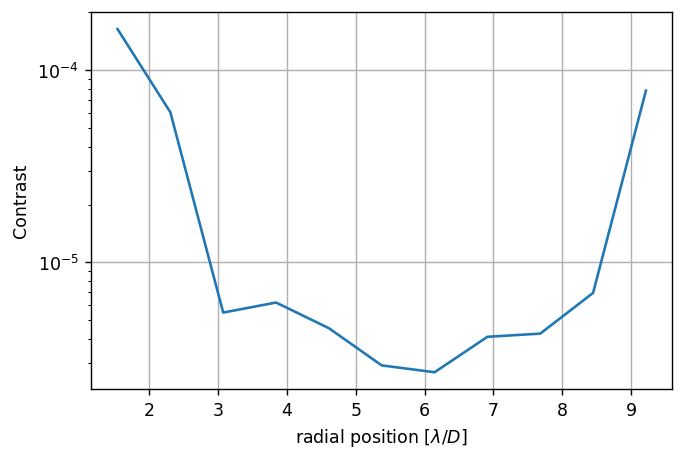

	Closed-loop iteration 3 / 20


(792,)

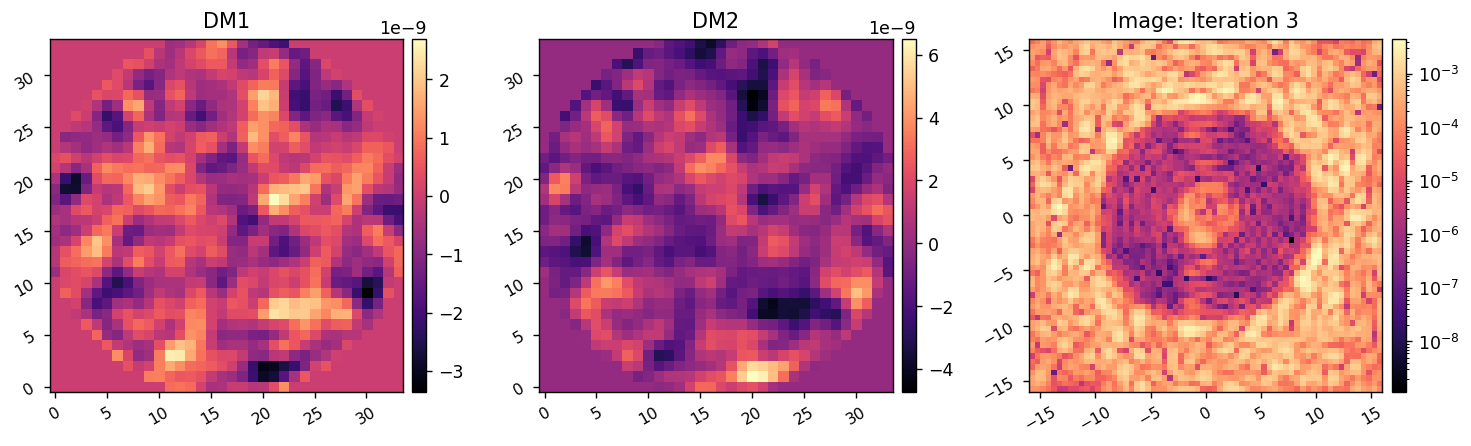

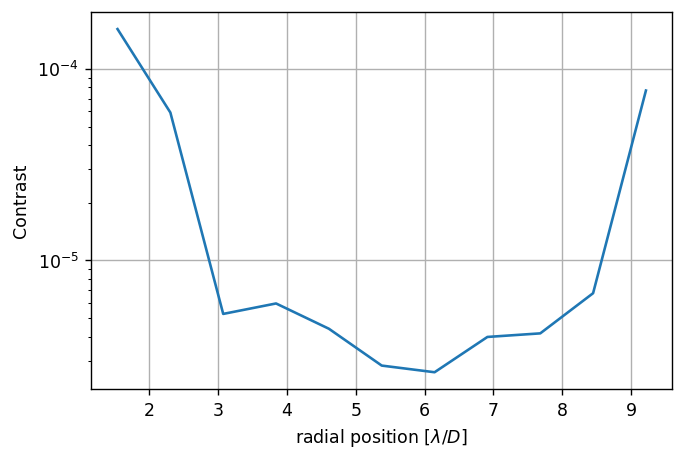

	Closed-loop iteration 4 / 20


(792,)

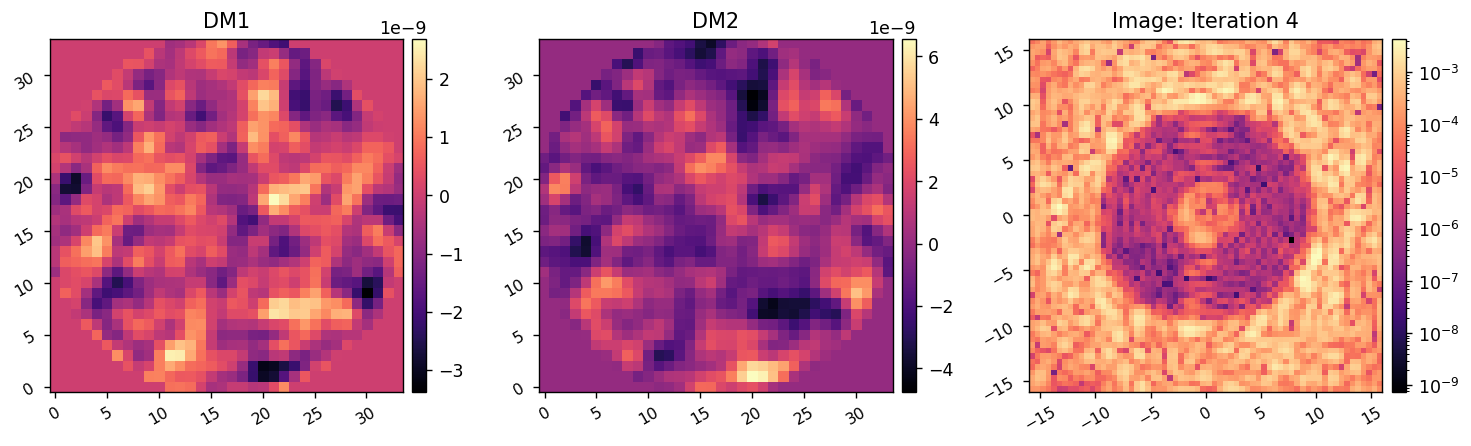

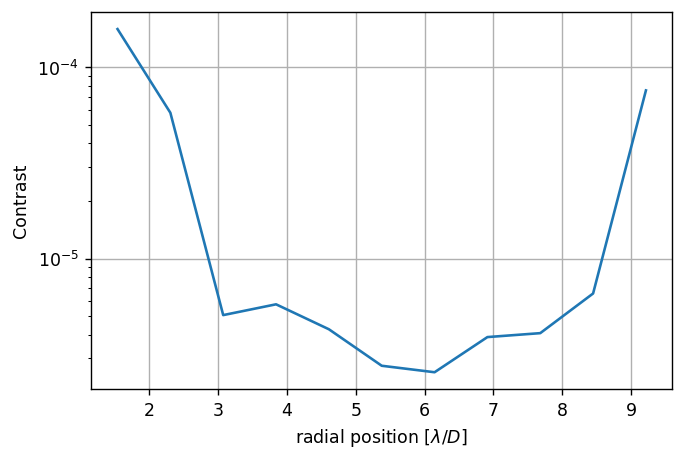

	Closed-loop iteration 5 / 20


(792,)

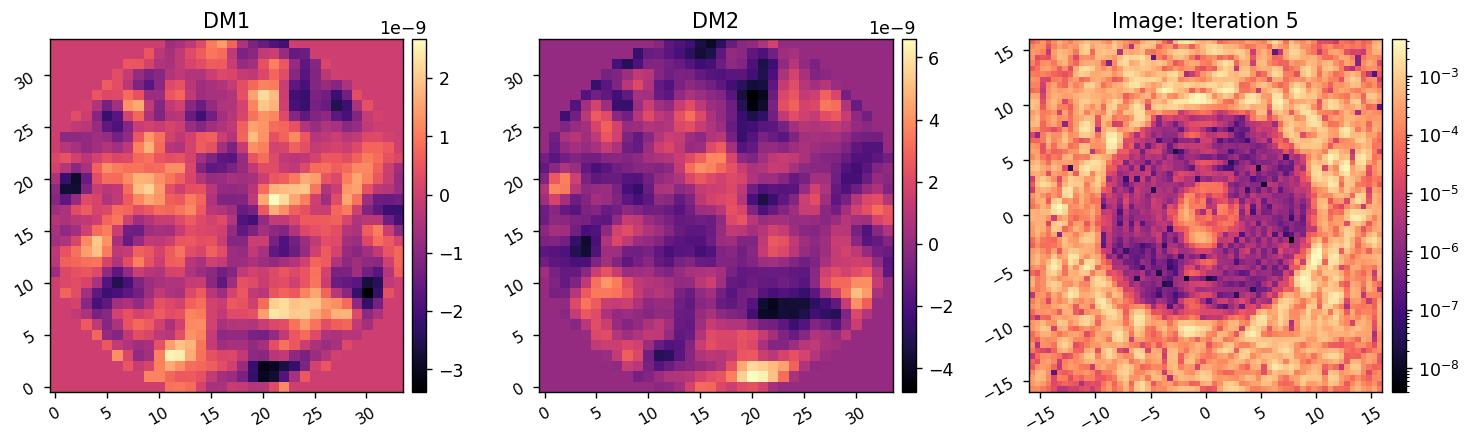

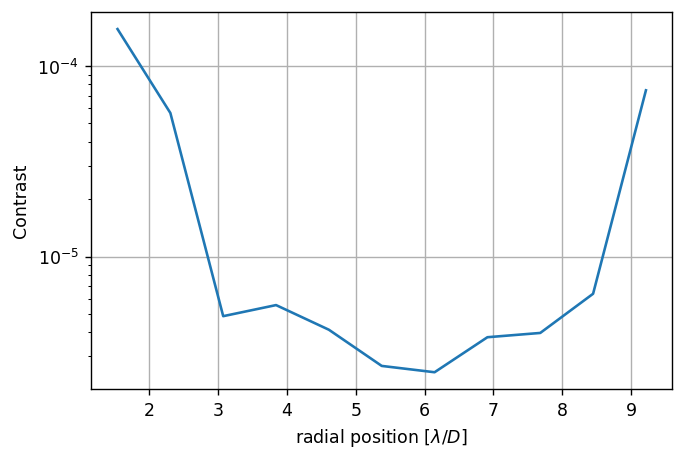

	Closed-loop iteration 6 / 20


(792,)

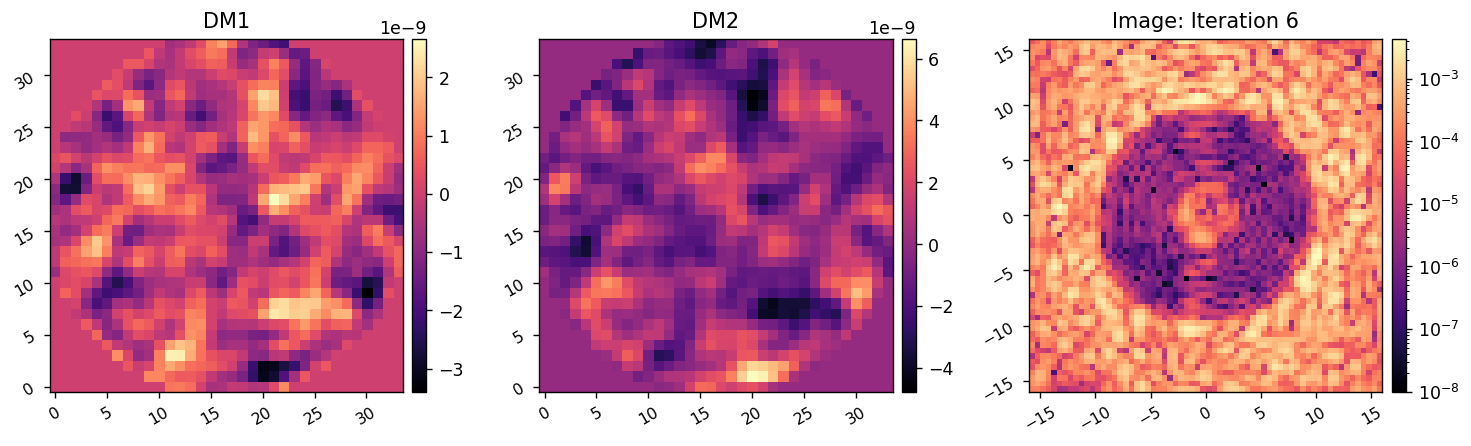

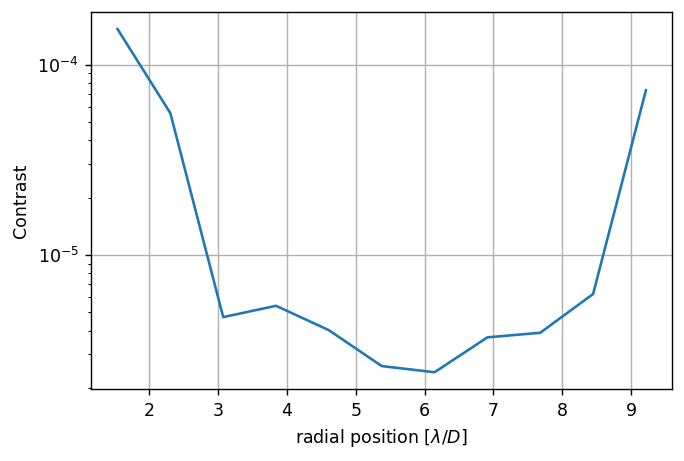

	Closed-loop iteration 7 / 20


(792,)

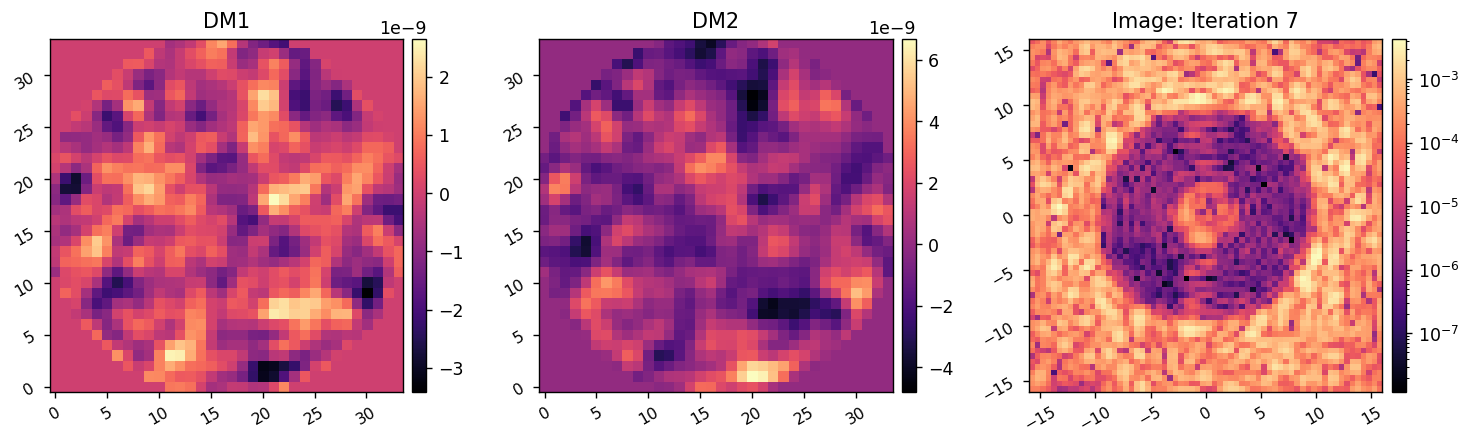

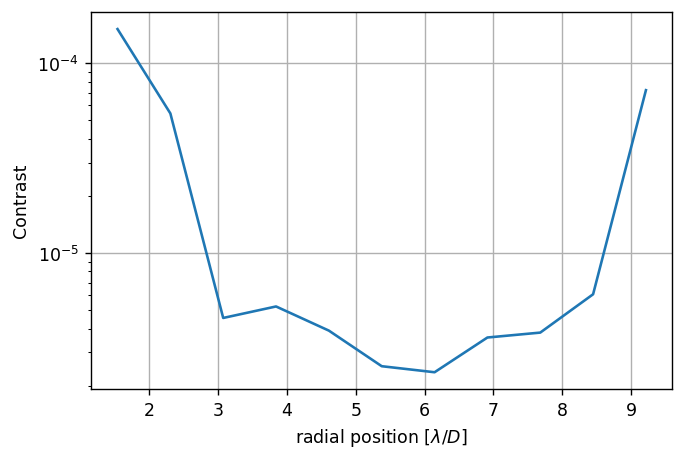

	Closed-loop iteration 8 / 20


(792,)

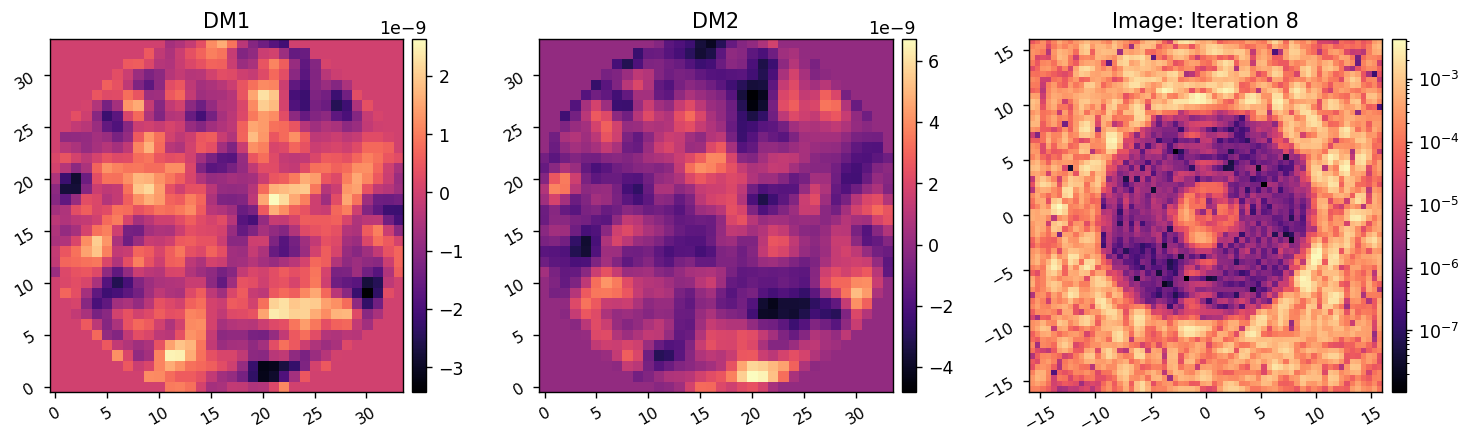

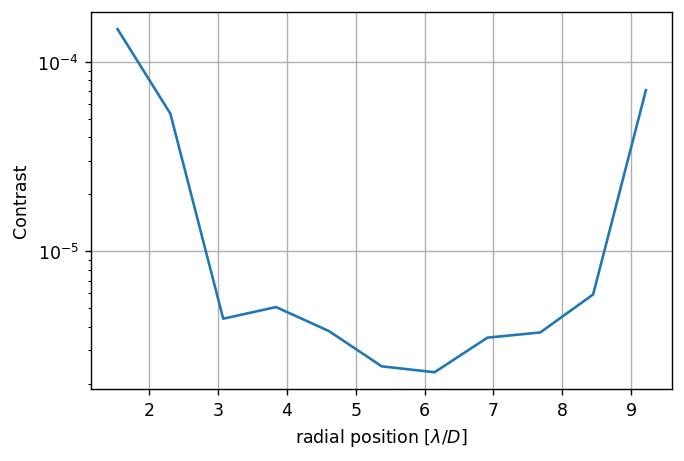

	Closed-loop iteration 9 / 20


(792,)

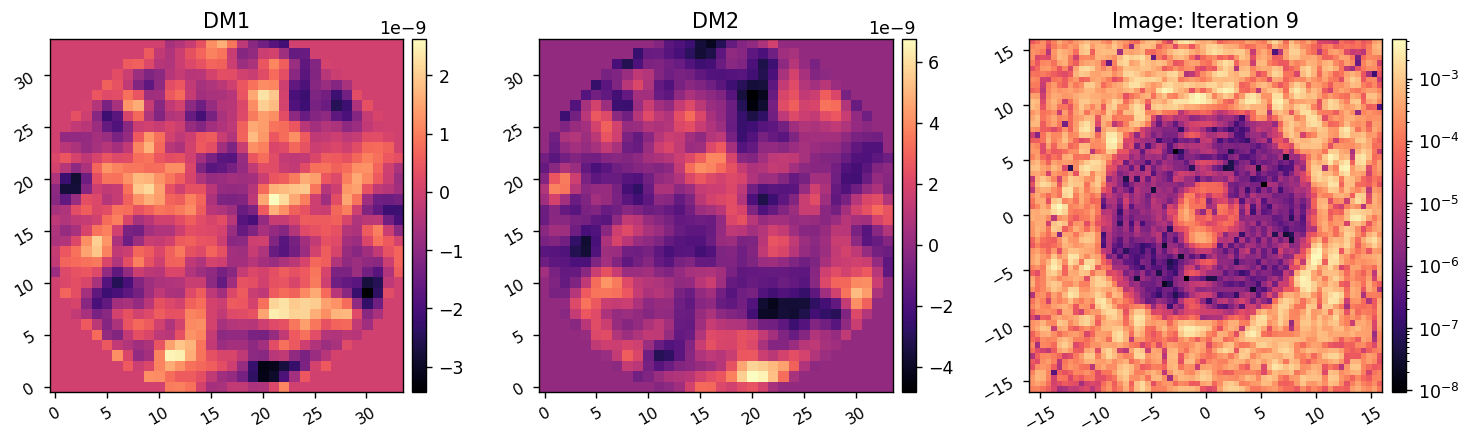

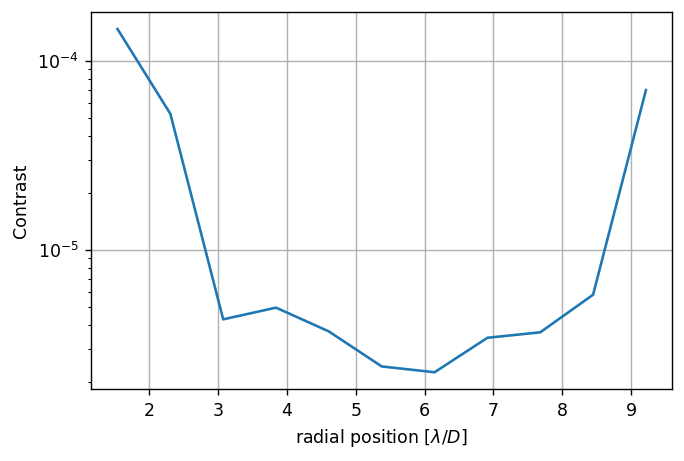

	Closed-loop iteration 10 / 20


(792,)

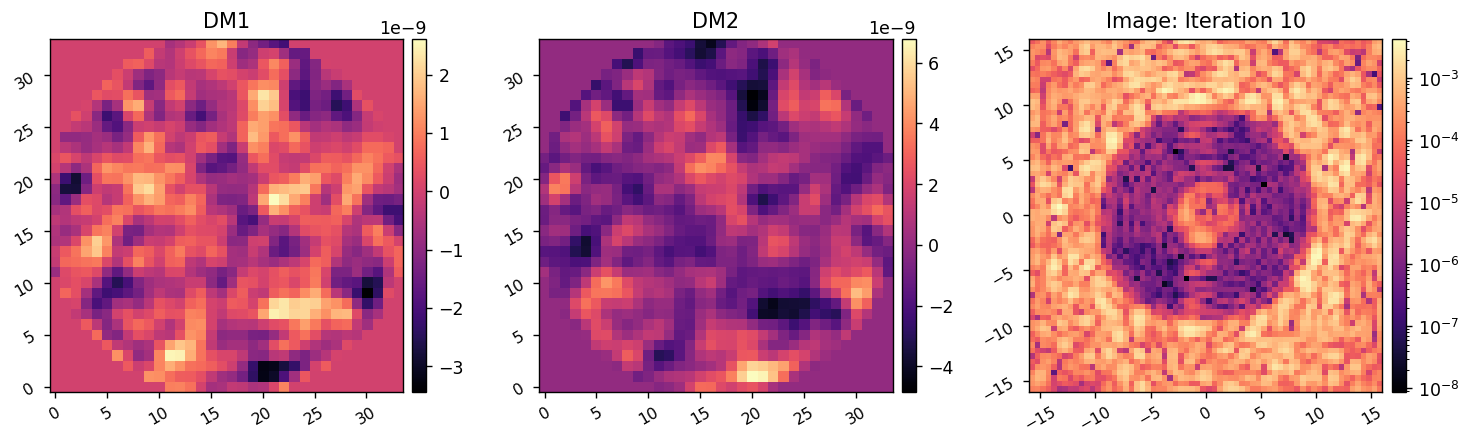

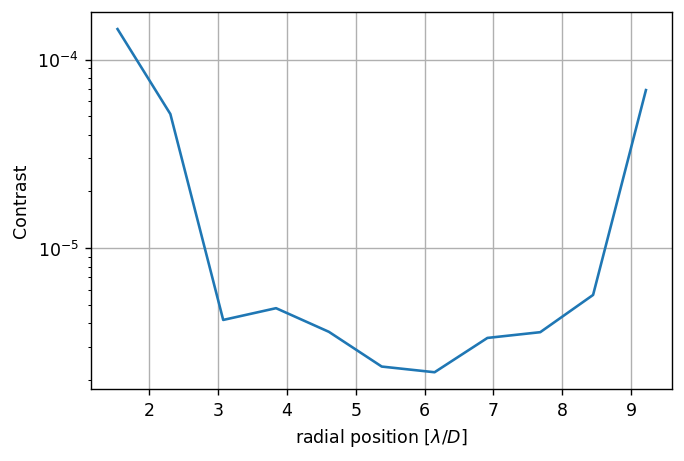

	Closed-loop iteration 11 / 20


(792,)

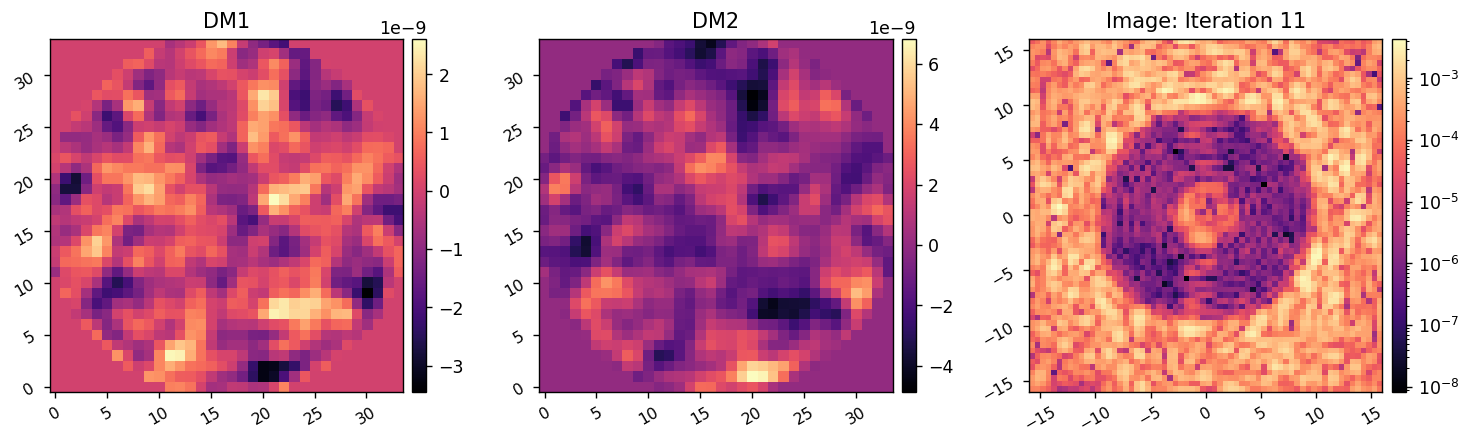

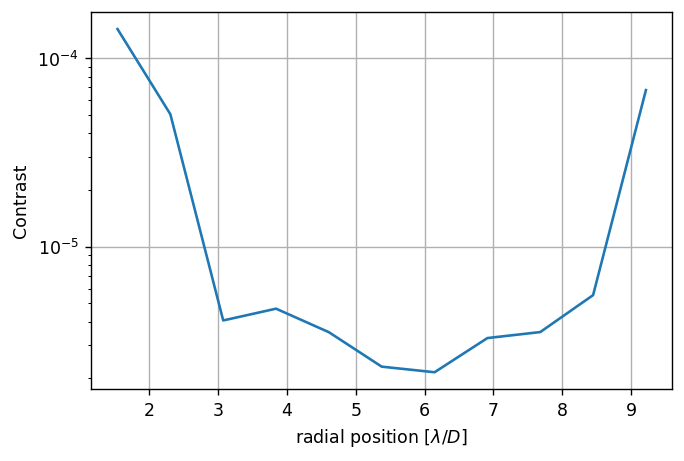

	Closed-loop iteration 12 / 20


(792,)

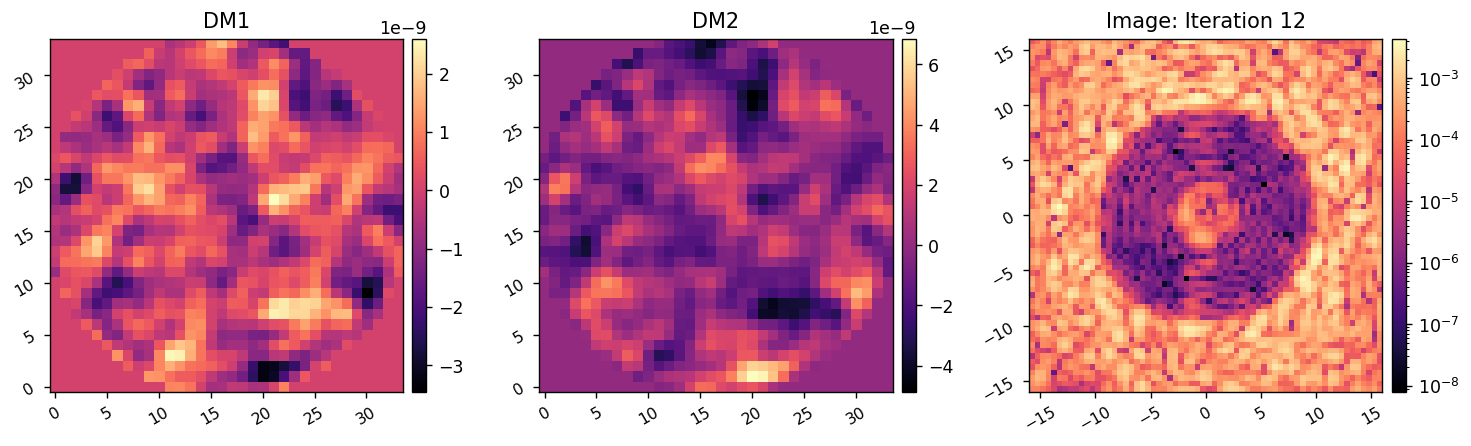

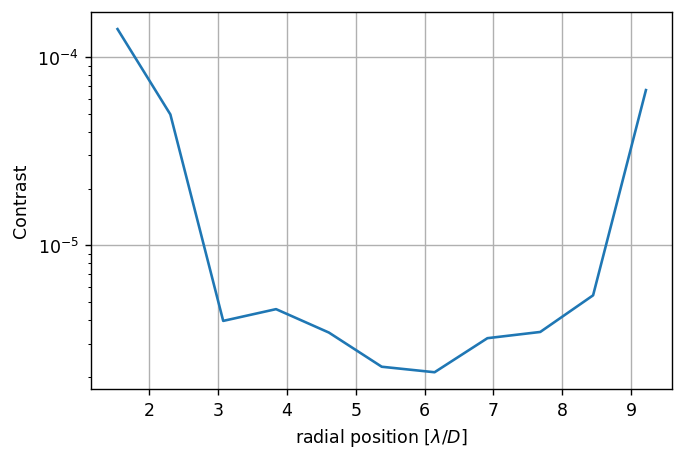

	Closed-loop iteration 13 / 20


(792,)

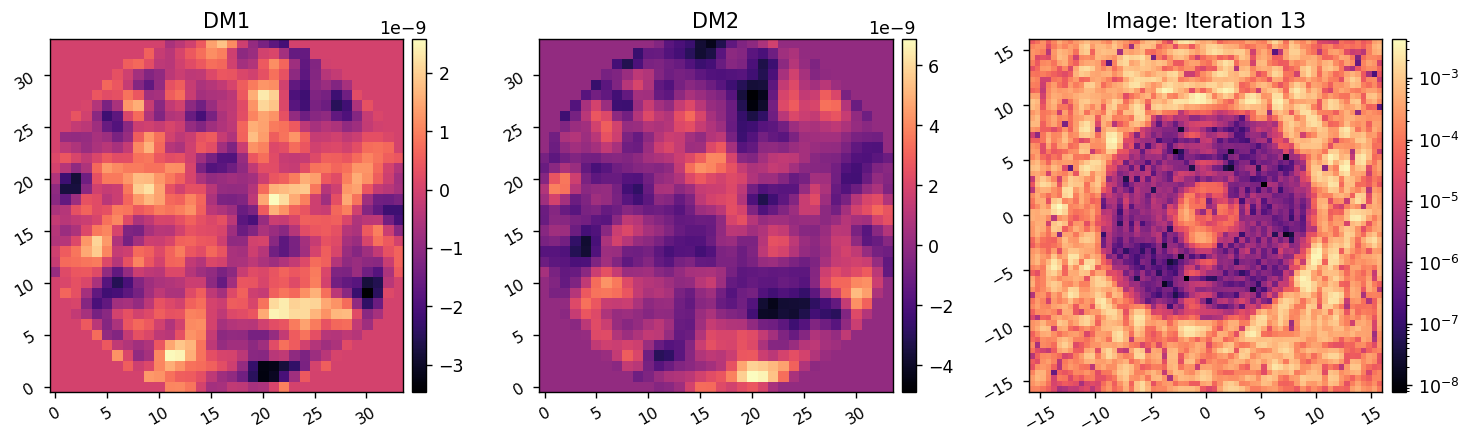

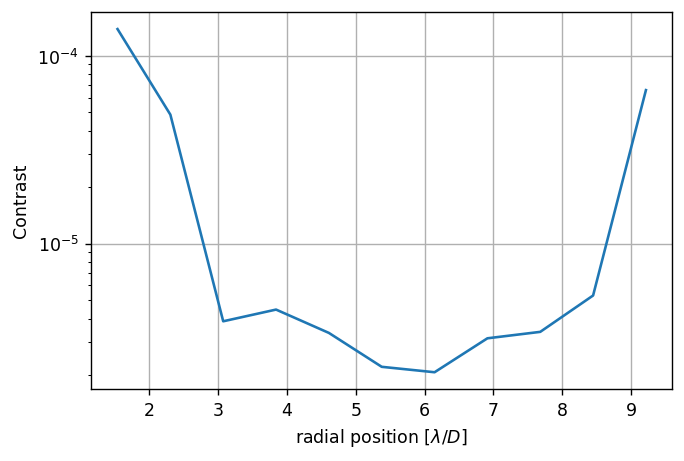

	Closed-loop iteration 14 / 20


(792,)

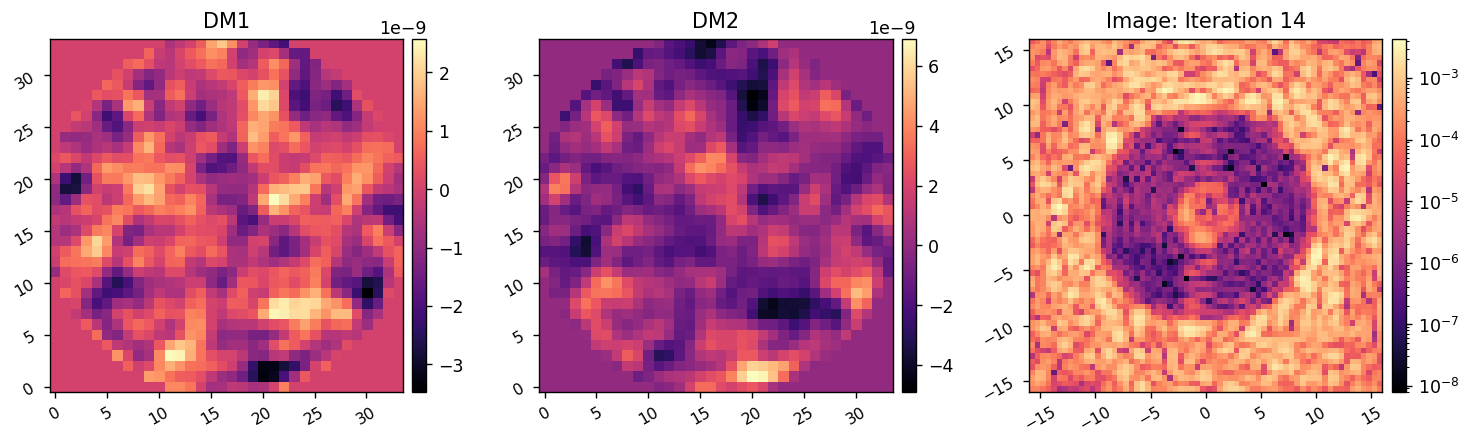

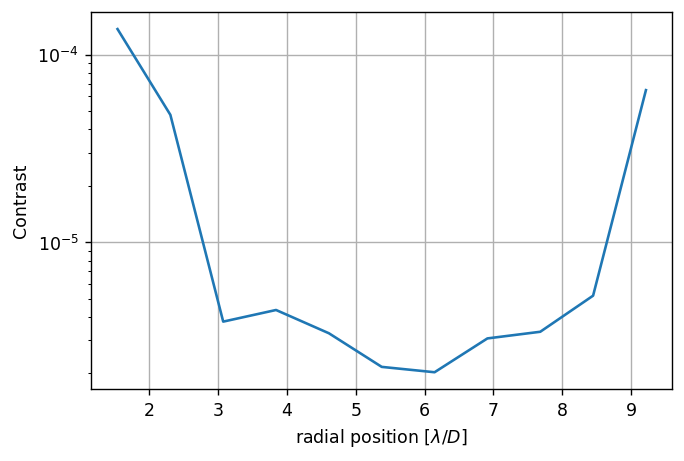

	Closed-loop iteration 15 / 20


(792,)

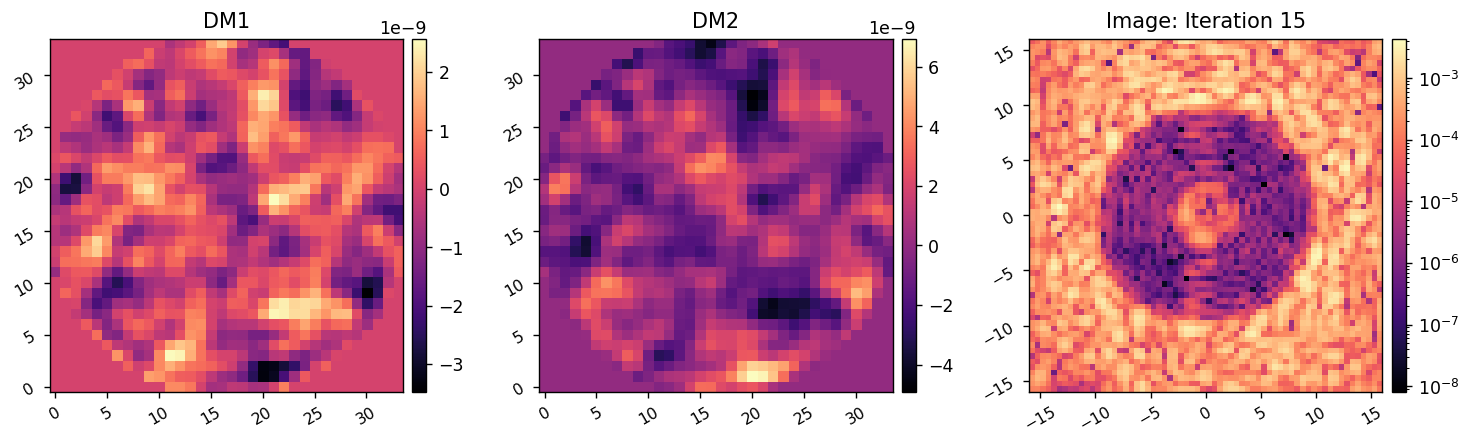

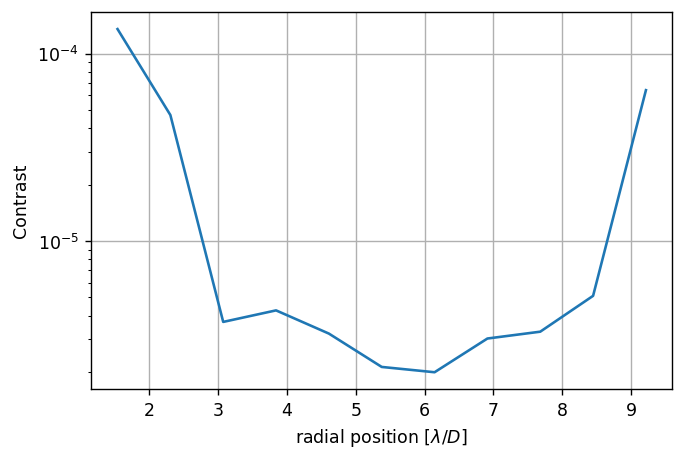

	Closed-loop iteration 16 / 20


(792,)

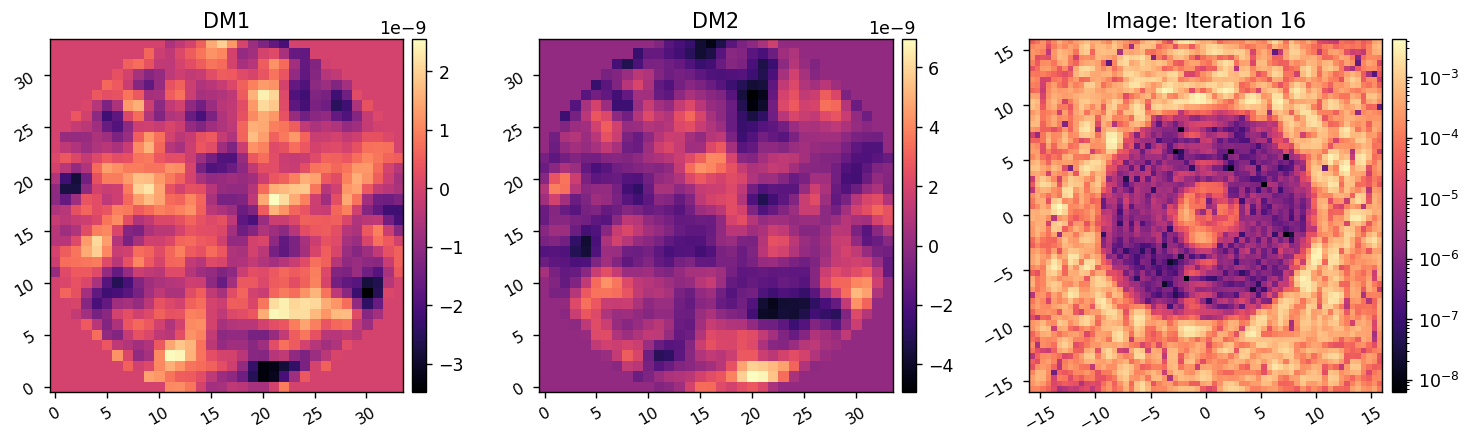

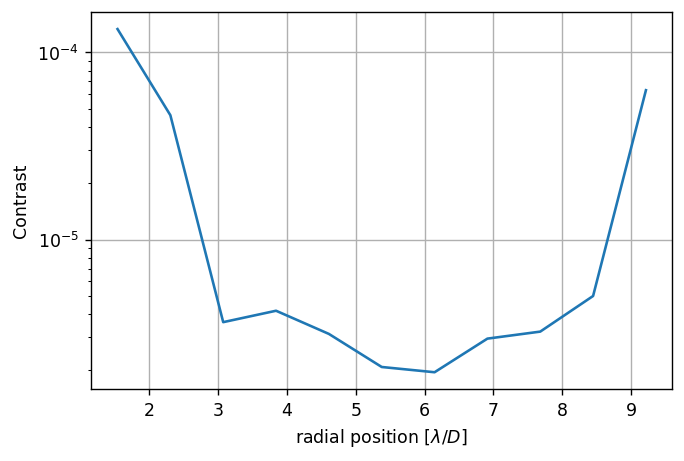

	Closed-loop iteration 17 / 20


(792,)

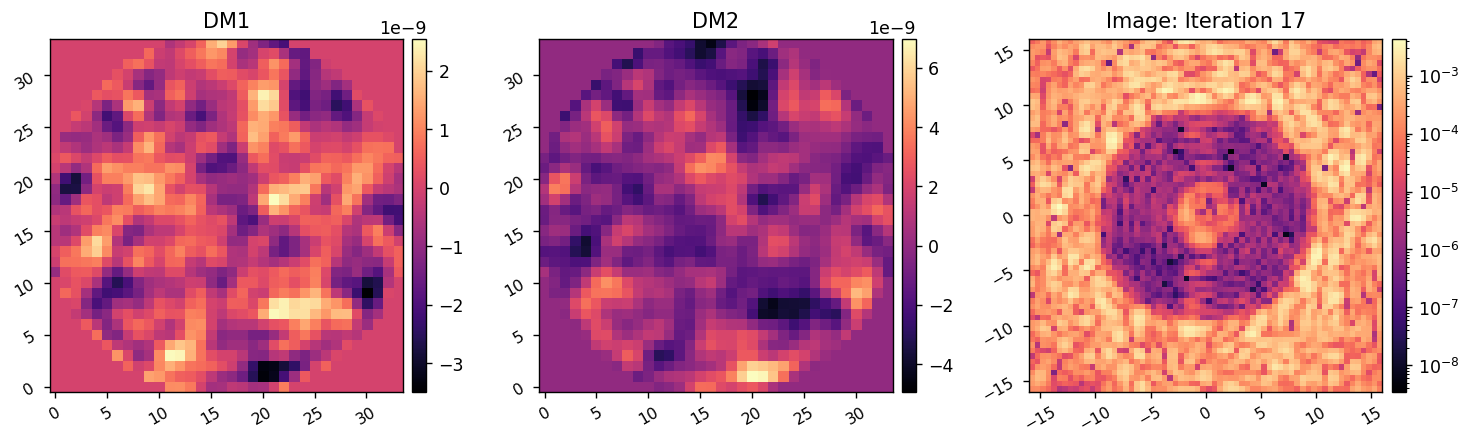

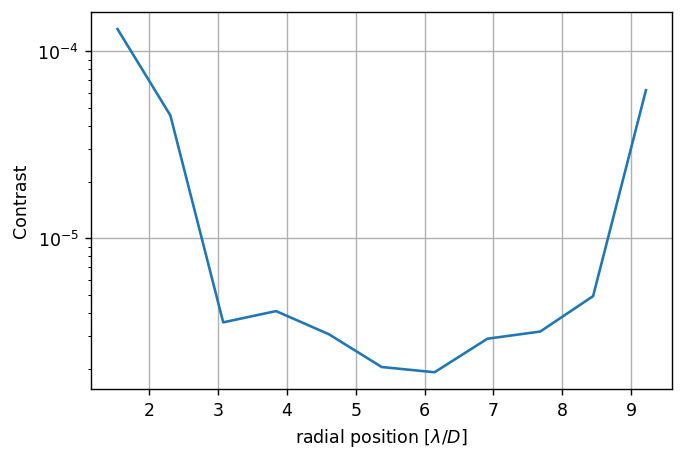

	Closed-loop iteration 18 / 20


(792,)

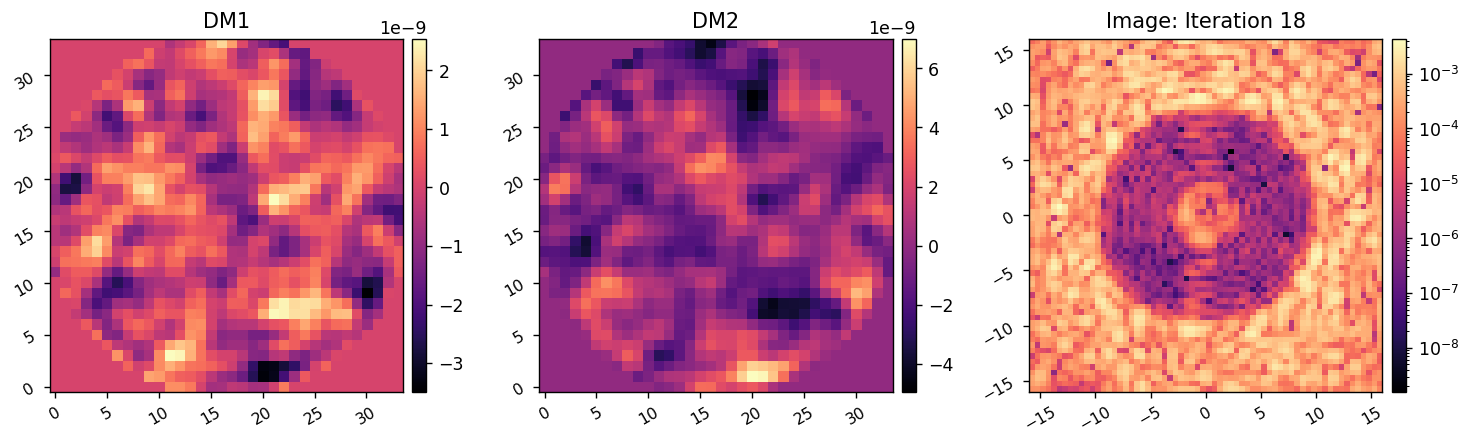

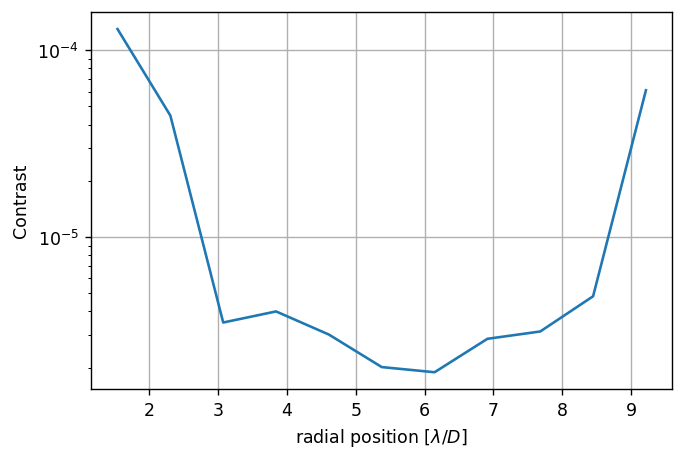

	Closed-loop iteration 19 / 20


(792,)

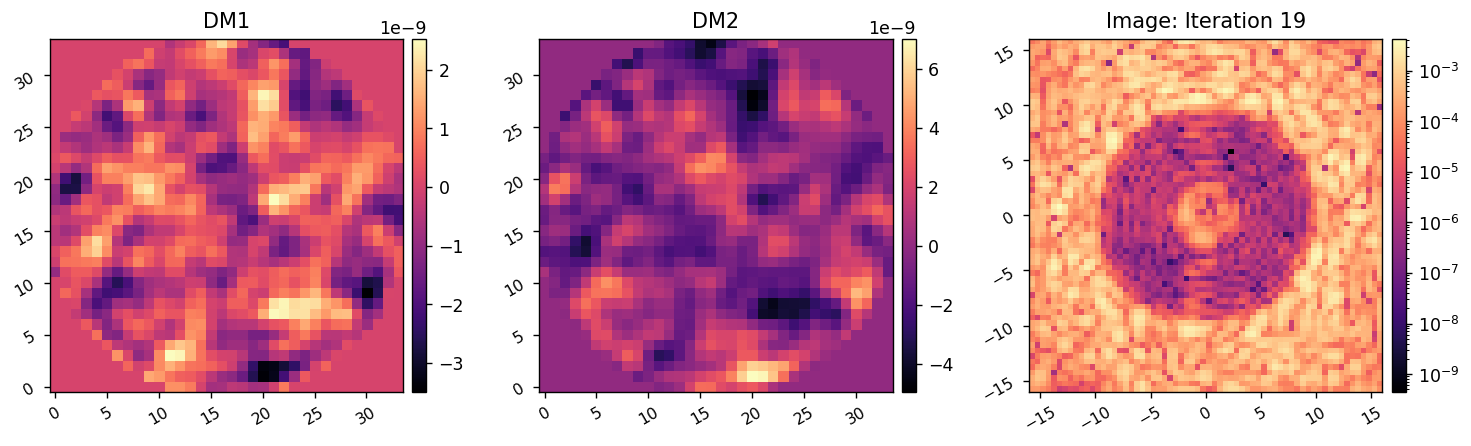

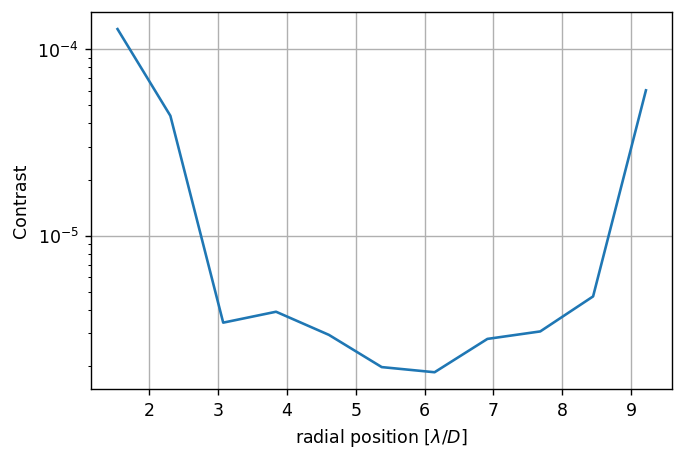

	Closed-loop iteration 20 / 20


(792,)

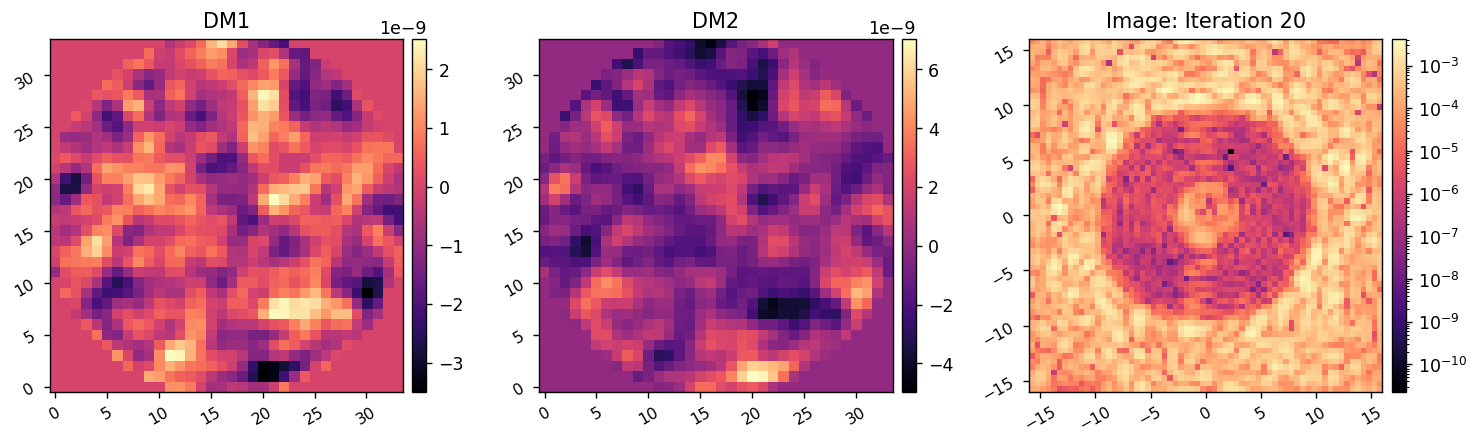

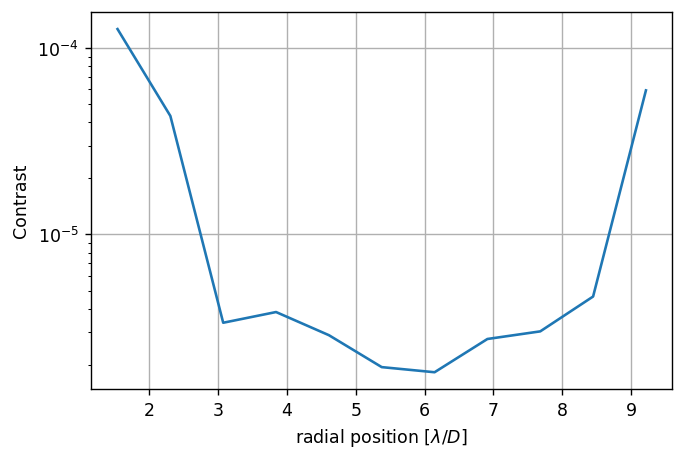

I-EFC loop completed in 40.423s.


In [38]:
reload(wfsc.iefc_2dm)
reload(wfsc.utils)

c.reset_dms()

reg_conds = [(1e-2,10), (1e-3, 20), (1e-3, 20)]

Wmatrix = np.diag(np.concatenate((weight_map[control_mask], weight_map[control_mask], weight_map[control_mask])))

for i in range(len(reg_conds)):
    
    cm_tik = wfsc.utils.TikhonovInverse(response_matrix, rcond=reg_conds[i][0])
    cm_wls = wfsc.utils.WeightedLeastSquares(response_matrix, Wmatrix, rcond=reg_conds[i][0])
    
    images, dm1_commands, dm2_commands = wfsc.iefc_2dm.run(c, 
                                              cm_wls,
                                              probe_modes, 
                                              probe_amp, 
                                              fourier_modes,
                                              control_mask, 
                                              num_iterations=reg_conds[i][1], 
                                              loop_gain=0.5, 
                                              leakage=0.0,
                                              plot_all=True,
                                             )